## Цели и задачи

Вводные данные:
- Интернет-магазин «ХХХ» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. 
- Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. 
- Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Возможный вариант — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Цель:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи:**
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
 - 2.1. Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - 2.2. Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - 2.3. Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - 2.4. Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Представть группы признаков (вместе с целевым) в виде диаграммы Исикавы.
На диаграмме входные признаки объединены в четыре группы: коммуникация с клиентом, продуктовое поведение, поведение на сайте и финансовое поведение.
4. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
5. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
6. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Планируемые этапы:
1. Разработайте модель, которая предскажет вероятность снижения покупательской активности.
2. Выделить сегмент (или сегменты) покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. Используя данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). 

## Загрузка данных
Сначала загрузим библиотеки, потом данные.

#### Описание данных
**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**market_time.csv**
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**money.csv**
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
    )

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# импортируем функции для оценки
from sklearn.metrics import (
    mean_absolute_error, 
    r2_score, 
    confusion_matrix, 
    recall_score, 
    precision_score,
    roc_curve,
    roc_auc_score
    )


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [4]:
try:  
    market = pd.read_csv('/datasets/market_file.csv', sep=',')
    market_money = pd.read_csv('/datasets/market_money.csv', sep=',')
    market_time = pd.read_csv('/datasets/market_time.csv', sep=',')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')
except:
    market = pd.read_csv(r'.\\market_file.csv', sep=',') 
    market_money = pd.read_csv(r'.\\market_money.csv', sep=',')
    market_time = pd.read_csv(r'.\\market_time.csv', sep=',')
    money = pd.read_csv(r'.\\money.csv', sep=';', decimal = ',')

def viewing_statistics(df_list):
    print('Посмотрим на данные:')
    for i in table:
        if len(i) >= 3:
            display(i.sample(3))
        else:
            display(i)
        display(i.info())
        display(i.columns)
        print('\n')
table = [market, market_money, market_time , money]   

viewing_statistics(table)

Посмотрим на данные:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.2,Техника для красоты и здоровья,5,3,3,11
386,215734,Снизилась,премиум,да,3.8,4,1051,0.2,Косметика и аксесуары,2,4,3,7
552,215900,Снизилась,стандарт,да,4.8,4,907,0.3,Косметика и аксесуары,2,1,1,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

,id,Период,Выручка
3833,216625,препредыдущий_месяц,4949.0
3361,216468,препредыдущий_месяц,4765.0
1051,215698,текущий_месяц,3520.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

Index(['id', 'Период', 'Выручка'], dtype='object')

,id,Период,минут
1495,216095,предыдцщий_месяц,17
1673,216184,текущий_месяц,13
2272,216484,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

Index(['id', 'Период', 'минут'], dtype='object')

,id,Прибыль
1147,216495,3.8
195,215543,2.5
602,215950,4.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Index(['id', 'Прибыль'], dtype='object')

**Выводы:**  
1. id - везде тип int.
2. Пропусков нет.
3. Названия колонок не соотвествуют стандарту, но по требованиям их нужно оставить кириллическими.
4. Типы данных везде верные, но некоторые (Активность, сервис, сообщения, период, нужно посмотреть, возможно приветси к bool.
5. Объем небольшой, сможем обрабатывать все в памяти.
6. Не удобно работать без дат.

##  Предобработка данных

In [5]:

for i in ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать']:
    unique_values = market[i].unique()[:4]
    print(f"Первые уникальные значения в '{i}': {unique_values}")
    
print('\n', "Первые уникальные значения в market_money - Период", market_money['Период'].unique()[:4].tolist())
print('\n', "Первые уникальные значения в market_time - Период", market_time['Период'].unique()[:4].tolist())    

Первые уникальные значения в 'Покупательская активность': ['Снизилась' 'Прежний уровень']
Первые уникальные значения в 'Тип сервиса': ['премиум' 'стандартт' 'стандарт']
Первые уникальные значения в 'Разрешить сообщать': ['да' 'нет']

 Первые уникальные значения в market_money - Период ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']

 Первые уникальные значения в market_time - Период ['текущий_месяц', 'предыдцщий_месяц']


In [6]:
# market_money['Период'] = market_money['Период'].replace('препредыдущий_месяц', 'предыдущий_месяц')
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market['Тип сервиса'] = market['Тип сервиса'].replace('стандартт', 'стандарт')

for i in ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать']:
    unique_values = market[i].unique()[:4]
    print(f"Первые уникальные значения в '{i}': {unique_values}")
    
print('\n', "Первые уникальные значения в market_money - Период", market_money['Период'].unique()[:4].tolist())
print('\n', "Первые уникальные значения в market_time - Период", market_time['Период'].unique()[:4].tolist()) 

Первые уникальные значения в 'Покупательская активность': ['Снизилась' 'Прежний уровень']
Первые уникальные значения в 'Тип сервиса': ['премиум' 'стандарт']
Первые уникальные значения в 'Разрешить сообщать': ['да' 'нет']

 Первые уникальные значения в market_money - Период ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']

 Первые уникальные значения в market_time - Период ['текущий_месяц', 'предыдущий_месяц']


In [7]:
    
def str_norm(df):
    str_columns = df.select_dtypes(include='object').columns.tolist()
    print('Столбцы с категориальными данными: ', str_columns,
         '\n \n Всего категориальных столбцов: ', len(str_columns))
    for column in str_columns:
        df[column] = df[column].str.strip()
        
str_norm(market)        
str_norm(market_money)
str_norm(market_time)
print('Обработали пробелы, \n обрабатываем дубликаты:') 

for df in (market, market_money, market_time, money):
    print(f'Размеры таблицы : {len(df)} строк.')
    df.drop_duplicates(inplace=True)
    
print(f'\n Проверяем:')    
for df in (market, market_money, market_time, money):
    print(f'Размеры таблицы : {len(df)} строк.')
    

table = [market, market_money, market_time , money] 
print('Посмотрим на пропуски:')
for i in table:
    display(i.isnull().mean().sort_values())
    
print('Явных пропусков нет. \n')
    
viewing_statistics(table) 

Столбцы с категориальными данными:  ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'] 
 
 Всего категориальных столбцов:  4
Столбцы с категориальными данными:  ['Период'] 
 
 Всего категориальных столбцов:  1
Столбцы с категориальными данными:  ['Период'] 
 
 Всего категориальных столбцов:  1
Обработали пробелы, 
 обрабатываем дубликаты:
Размеры таблицы : 1300 строк.
Размеры таблицы : 3900 строк.
Размеры таблицы : 2600 строк.
Размеры таблицы : 1300 строк.

 Проверяем:
Размеры таблицы : 1300 строк.
Размеры таблицы : 3900 строк.
Размеры таблицы : 2600 строк.
Размеры таблицы : 1300 строк.
Посмотрим на пропуски:


id                                    0.0
Покупательская активность             0.0
Тип сервиса                           0.0
Разрешить сообщать                    0.0
Маркет_актив_6_мес                    0.0
Маркет_актив_тек_мес                  0.0
Длительность                          0.0
Акционные_покупки                     0.0
Популярная_категория                  0.0
Средний_просмотр_категорий_за_визит   0.0
Неоплаченные_продукты_штук_квартал    0.0
Ошибка_сервиса                        0.0
Страниц_за_визит                      0.0
dtype: float64

id        0.0
Период    0.0
Выручка   0.0
dtype: float64

id       0.0
Период   0.0
минут    0.0
dtype: float64

id        0.0
Прибыль   0.0
dtype: float64

Явных пропусков нет. 

Посмотрим на данные:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
803,216151,Прежний уровень,премиум,нет,2.6,4,708,0.1,Товары для детей,2,5,5,14
1062,216410,Прежний уровень,премиум,да,4.8,3,939,0.1,Домашний текстиль,6,1,7,12
822,216170,Прежний уровень,стандарт,да,4.7,4,955,0.2,Товары для детей,4,4,3,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

,id,Период,Выручка
709,215584,препредыдущий_месяц,4470.0
1238,215760,препредыдущий_месяц,5089.0
853,215632,препредыдущий_месяц,4729.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.9+ KB


None

Index(['id', 'Период', 'Выручка'], dtype='object')

,id,Период,минут
2193,216444,текущий_месяц,14
1450,216073,предыдущий_месяц,9
1104,215900,предыдущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.2+ KB


None

Index(['id', 'Период', 'минут'], dtype='object')

,id,Прибыль
760,216108,4.4
1254,216602,3.0
159,215507,2.4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.5 KB


None

Index(['id', 'Прибыль'], dtype='object')

**Выводы:** 
1. Пропусков нет.
2. Типы данных корректировки не потребовали. 
3. Неявные дубликаты исправлены.
4. Удалили дубли.

## Исследовательский анализ данных

In [8]:
def e_d_a(variable, name, table):
    print(f'Смотрим статистику: {name}')
    # Статистика
    display(table[variable].describe())

    # Гистограмма
    plt.figure(figsize=(15, 6))
    table[variable].hist(bins=30, range=(max(0, table[variable].min()), table[variable].max()))
    plt.title(f'Распределение {name}')
    plt.xlabel(f'{name}')
    plt.ylabel('Частота')
    plt.show()
    
    # Диаграмма с усами
    plt.figure(figsize=(15, 4))
    table.boxplot(column=variable, vert=False, color='green', widths=0.6)
    plt.title(f'Диаграмма межквартильного размаха для {name}')
    plt.xlabel(f'{name}')
    plt.yticks([]) 
    plt.grid(True, linestyle='--', alpha=0.2, linewidth=1.5)
    plt.show()


    # Описание границ
    print('\n', f'{name} находится в диапазоне от {table[variable].min():.2f}',
          f'до {table[variable].max():.2f}, посмотрим как распределяются данные, видим на графике выше:'
         )

    # Вывод 75% и 98% квантилей
    print(f'75% объектов находятся в диапазоне до {table[variable].quantile(0.75):.1f}',
          f'\n \n Всего значений отличных от 0: {len(table[table[variable]>0]):.1f}.',
          f'\n 1Q = {table[variable].quantile(0.25):.1f},',
          f'\n 3Q = {table[variable].quantile(0.75):.1f},',
          f'\n Межквартильный размах = {(table[variable].quantile(0.75) - table[variable].quantile(0.25)):.1f},',
         )
    
def e_d_a_categorical(variable, name, table):
    counts = table[variable].value_counts().sort_values(ascending=False)
    print(f'Смотрим статистику: {name}')
    display(table[variable].describe())
    print('Лидеров и аутсайдеров: ')
    display(counts)
    if len(counts)>20:
        print('Посмотрим на графике ТОП-10: ')
        plt.bar(counts.head(10).index, counts.head(10).values)
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title(f'Распределение признака {name}')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(counts.min()*0.9, counts.max()*1.05)
        plt.show()
    else: 
        print('Посмотрим на графике: ')
        plt.bar(counts.head(10).index, counts.head(10).values)
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title(f'Распределение признака {name}')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(counts.min()*0.9, counts.max()*1.05)
        plt.show()
        
        
def e_d_a_spl(variable, name, table):
    print(f'Смотрим статистику: {name}')
    # Статистика
    display(table[variable].describe())

    # Гистограмма
    plt.figure(figsize=(15, 6))
    for j, group in table.groupby('Покупательская активность'):
        group[variable].hist(
            bins=30, range=(max(0, group[variable].min()), group[variable].max()), 
            alpha=0.5, 
            label=j)
    plt.title(f'Распределение {name}')
    plt.xlabel(f'{name}')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

    # Диаграмма с усами
    plt.figure(figsize=(15, 4))
    table.boxplot(
        column=variable, by='Покупательская активность', vert=False, color='green', widths=0.6)
    plt.title(f'Диаграмма межквартильного размаха для {name}')
    plt.xlabel(f'{name}')
    plt.yticks([])  # Убираем метки по оси Y, так как она не используется
    plt.grid(True, linestyle='--', alpha=0.2, linewidth=1.5)
    plt.show()


    # Описание границ
    print('\n', f'{name} находится в диапазоне от {table[variable].min():.2f}',
          f'до {table[variable].max():.2f}, посмотрим как распределяются данные, видим на графике выше:'
         )

    # Вывод 75% и 98% квантилей
    print(f'75% объектов находятся в диапазоне до {table[variable].quantile(0.75):.1f}',
          f'\n \n Всего значений отличных от 0: {len(table[table[variable]>0]):.1f}.',
          f'\n 1Q = {table[variable].quantile(0.25):.1f},',
          f'\n 3Q = {table[variable].quantile(0.75):.1f},',
          f'\n Межквартильный размах = {(table[variable].quantile(0.75) - table[variable].quantile(0.25)):.1f},',
         )
    
def e_d_a_categorical_spl(variable, name, table):
    counts = table[variable].value_counts().sort_values(ascending=False)
    print(f'Смотрим статистику: {name}')
    display(table[variable].describe())
    print('Лидеров и аутсайдеров: ')
    display(counts)
    # Создание списка уникальных значений в колонке "Покуп. акт."
    unique_values = table['Покупательская активность'].unique()

    # Создание цветов
    colors = ['green', 'orange'] 

    if len(counts)>20:
        print('Посмотрим на графике ТОП-10: ')

        # Построение графиков для каждого уникального значения
        for i, value in enumerate(unique_values):
            counts = table[table['Покупательская активность'] == value][variable].value_counts()
            plt.bar(counts.head(10).index, counts.head(10).values, alpha=0.5, label=value, color=colors[i % len(colors)])
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title('Сравнение значений в колонке Покуп.активность')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.show()
    else: 
        print('Посмотрим на графике: ')
        # Построение графиков для каждого уникального значения
        for i, value in enumerate(unique_values):
            counts = table[table['Покупательская активность'] == value][variable].value_counts()
            plt.bar(counts.head(10).index, counts.head(10).values, alpha=0.5, label=value, color=colors[i % len(colors)])
        plt.xlabel(name)
        plt.ylabel('Количество')
        plt.title('Сравнение значений в колонке Покуп.активность')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.show()






In [9]:
def type_col(df):
    numeric_columns = df.select_dtypes(include='number').columns
    text_columns = df.select_dtypes(include='object').columns
    boolean_columns = df.select_dtypes(include='bool').columns
    print(f'Числовые признаки: {numeric_columns.tolist()}\n', 
          f'Логические признаки: {boolean_columns.tolist()} \n',
          f'Строковые признаки: {text_columns.tolist()} \n',)
    try:
        display(df[numeric_columns.tolist()].describe())
    except:
        print('\n')
    try:
        display(df[boolean_columns.tolist()].describe())
    except:
        print('\n')
    try:
        display(df[text_columns.tolist()].describe())
    except:
        print('\n')
    
    
    
for i in table:
    type_col(i)

Числовые признаки: ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']
 Логические признаки: [] 
 Строковые признаки: ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'] 



,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0
mean,215997.5,4.3,4.0,601.9,0.3,3.3,2.8,4.2,8.2
std,375.4,1.0,0.7,249.9,0.2,1.4,2.0,2.0,4.0
min,215348.0,0.9,3.0,110.0,0.0,1.0,0.0,0.0,1.0
25%,215672.8,3.7,4.0,405.5,0.2,2.0,1.0,3.0,5.0
50%,215997.5,4.2,4.0,606.0,0.2,3.0,3.0,4.0,8.0
75%,216322.2,4.9,4.0,806.0,0.3,4.0,4.0,6.0,11.0
max,216647.0,6.6,5.0,1079.0,1.0,6.0,10.0,9.0,20.0


,Покупательская активность,Тип сервиса,Разрешить сообщать,Популярная_категория
count,1300,1300,1300,1300
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


Числовые признаки: ['id', 'Выручка']
 Логические признаки: [] 
 Строковые признаки: ['Период'] 



,id,Выручка
count,3900.0,3900.0
mean,215997.5,5025.7
std,375.3,1777.7
min,215348.0,0.0
25%,215672.8,4590.1
50%,215997.5,4957.5
75%,216322.2,5363.0
max,216647.0,106862.2


,Период
count,3900
unique,3
top,предыдущий_месяц
freq,1300


Числовые признаки: ['id', 'минут']
 Логические признаки: [] 
 Строковые признаки: ['Период'] 



,id,минут
count,2600.0,2600.0
mean,215997.5,13.3
std,375.3,4.1
min,215348.0,4.0
25%,215672.8,10.0
50%,215997.5,13.0
75%,216322.2,16.0
max,216647.0,23.0


,Период
count,2600
unique,2
top,предыдущий_месяц
freq,1300


Числовые признаки: ['id', 'Прибыль']
 Логические признаки: [] 
 Строковые признаки: [] 



,id,Прибыль
count,1300.0,1300.0
mean,215997.5,4.0
std,375.4,1.0
min,215348.0,0.9
25%,215672.8,3.3
50%,215997.5,4.0
75%,216322.2,4.7
max,216647.0,7.4


**Оставляем клиентов > 90 дней**

In [10]:
for i in [market, market_money, market_time , money]:
    display(i[i['id']==215348])

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13


,id,Прибыль
0,215348,1.0


Что бы корректно обработать, нужно оставить где выручка есть за все месяцы, а для этого нужно данные сначала объединить, сначала оставим только длительность сотрудничества более 90 дней, а позднее после объединения и разделения периодов, уберем тех, где выручки нет за все месяца.

In [11]:
print(f'Количество строк до фильтрации {len(market)}')
market = market[market['Длительность']>90]
print(f'Количество строк после фильтрации {len(market)}')


Количество строк до фильтрации 1300
Количество строк после фильтрации 1300


Смотрим статистику: Ср. маркетинговых коммуникаций


count   1300.0
mean       4.3
std        1.0
min        0.9
25%        3.7
50%        4.2
75%        4.9
max        6.6
Name: Маркет_актив_6_мес, dtype: float64

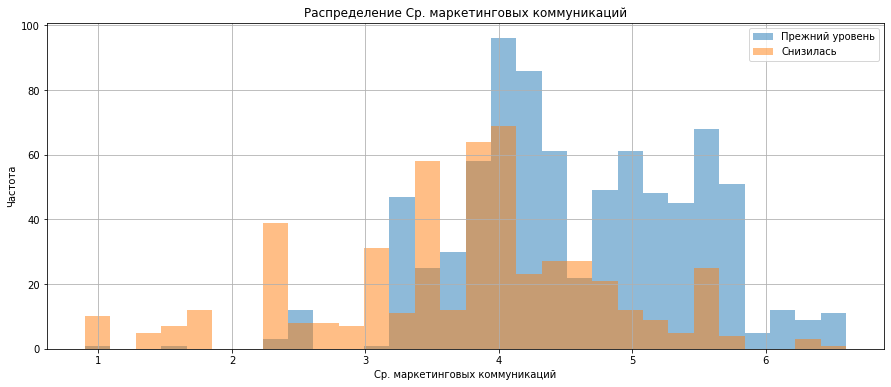

<Figure size 1080x288 with 0 Axes>

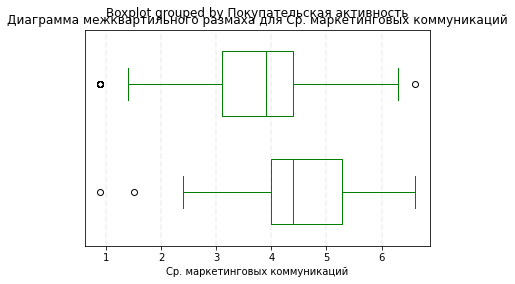


 Ср. маркетинговых коммуникаций находится в диапазоне от 0.90 до 6.60, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 4.9 
 
 Всего значений отличных от 0: 1300.0. 
 1Q = 3.7, 
 3Q = 4.9, 
 Межквартильный размах = 1.2,


In [12]:
e_d_a_spl('Маркет_актив_6_мес', 'Ср. маркетинговых коммуникаций', market)

Смотрим статистику: Маркет активность в тек. месяце


count   1300.0
mean       4.0
std        0.7
min        3.0
25%        4.0
50%        4.0
75%        4.0
max        5.0
Name: Маркет_актив_тек_мес, dtype: float64

Лидеров и аутсайдеров: 


4    669
5    323
3    308
Name: Маркет_актив_тек_мес, dtype: int64

Посмотрим на графике: 


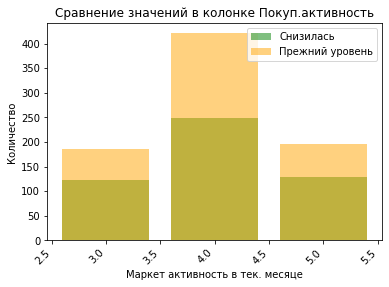

In [13]:
e_d_a_categorical_spl('Маркет_актив_тек_мес', 'Маркет активность в тек. месяце', market)

Смотрим статистику: Длительность


count   1300.0
mean     601.9
std      249.9
min      110.0
25%      405.5
50%      606.0
75%      806.0
max     1079.0
Name: Длительность, dtype: float64

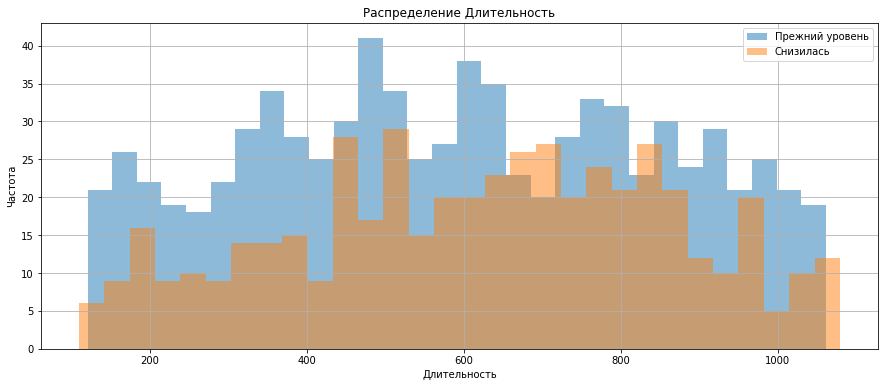

<Figure size 1080x288 with 0 Axes>

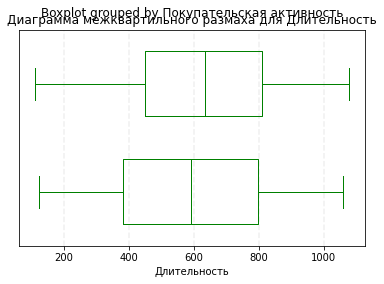


 Длительность находится в диапазоне от 110.00 до 1079.00, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 806.0 
 
 Всего значений отличных от 0: 1300.0. 
 1Q = 405.5, 
 3Q = 806.0, 
 Межквартильный размах = 400.5,


In [14]:
e_d_a_spl('Длительность', 'Длительность', market)

Смотрим статистику: Акционные_покупки


count   1300.0
mean       0.3
std        0.2
min        0.0
25%        0.2
50%        0.2
75%        0.3
max        1.0
Name: Акционные_покупки, dtype: float64

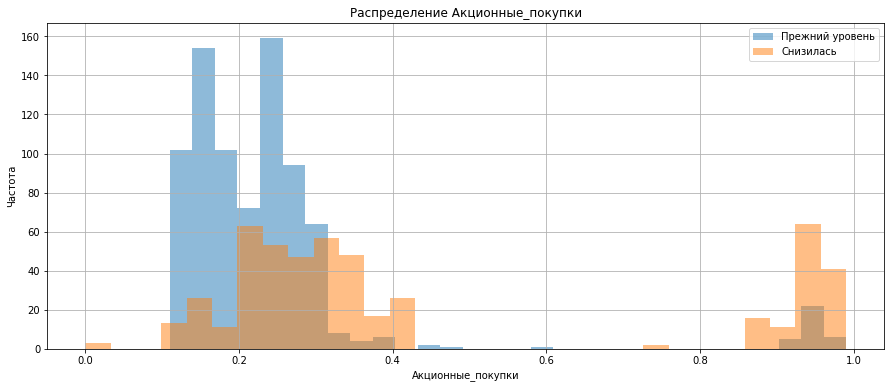

<Figure size 1080x288 with 0 Axes>

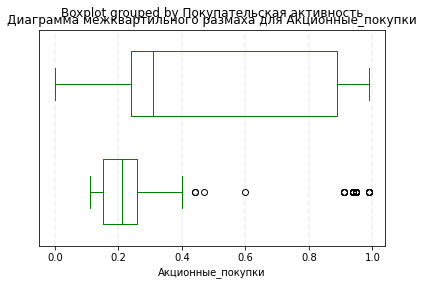


 Акционные_покупки находится в диапазоне от 0.00 до 0.99, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 0.3 
 
 Всего значений отличных от 0: 1297.0. 
 1Q = 0.2, 
 3Q = 0.3, 
 Межквартильный размах = 0.1,


In [15]:
e_d_a_spl('Акционные_покупки', 'Акционные_покупки', market)

Непонятная ситуация.
Скорее всего, небольшая часть покупает только то, что нужно, без акционных покупок, основная масса имеет небольшую долю акционных покупок, и есть группа которая покупает основную массу товаров по акции. 

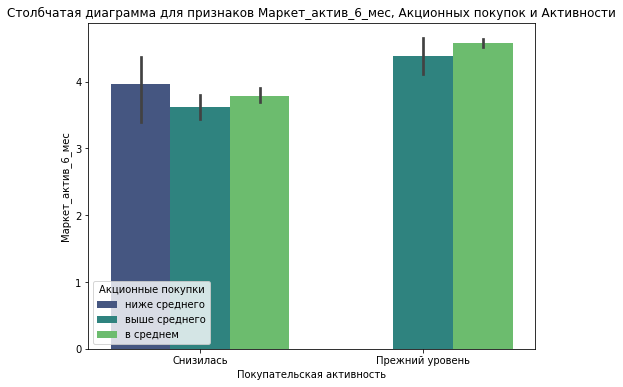

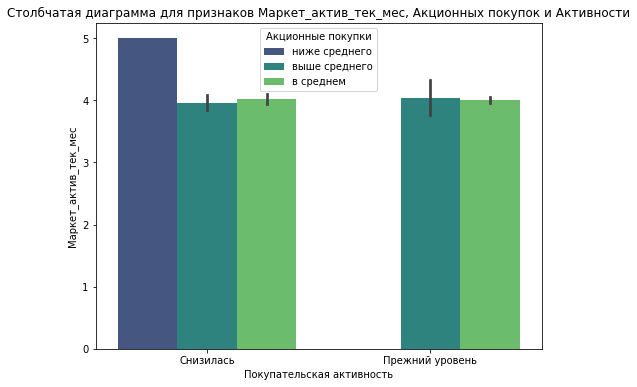

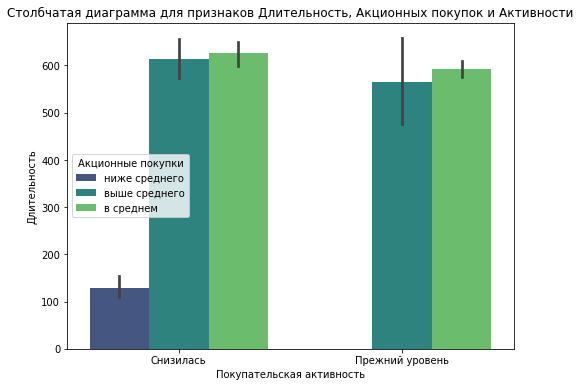

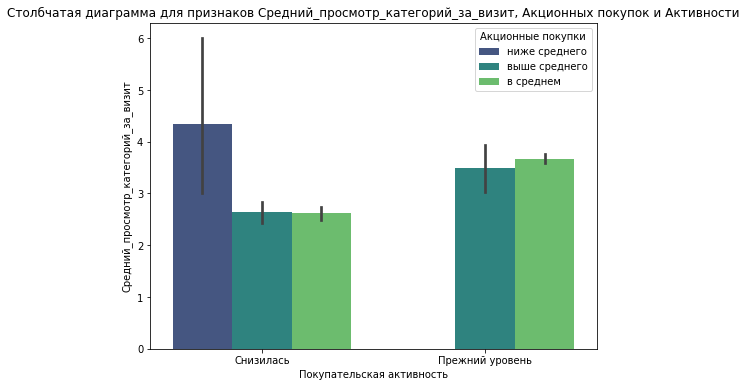

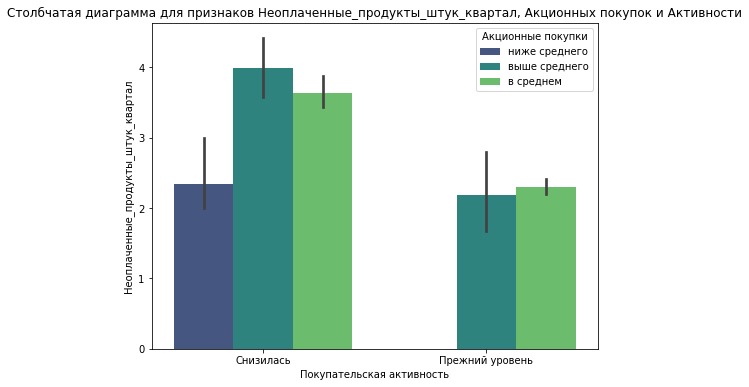

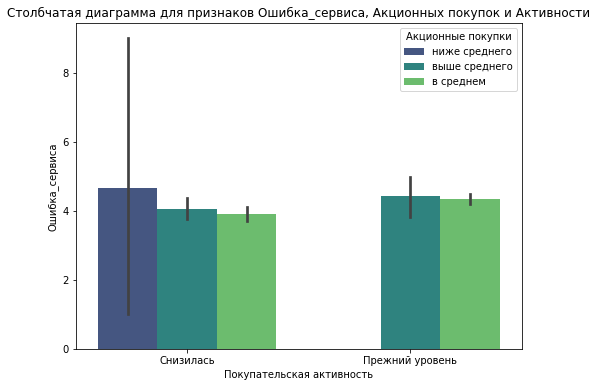

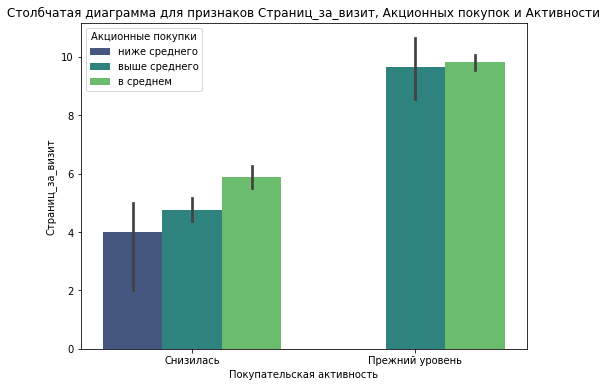

In [16]:
market_act = market.fillna(0)
numeric_columns = market_act[['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит']].select_dtypes(include='number').columns.tolist()

def categorize_purchase(purchase_value):
    if purchase_value == 0:
        return "ниже среднего"
    elif 0 < purchase_value <= 0.7:
        return "в среднем"
    elif purchase_value > 0.7:
        return "выше среднего"
    else:
        return "неверное значение"

market_act['Акционные_покупки_cat'] = market_act['Акционные_покупки'].apply(categorize_purchase)


unic_values = market_act['Акционные_покупки_cat'].unique()

for feature in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Покупательская активность', y=feature, hue='Акционные_покупки_cat', data=market_act, palette='viridis')
    plt.xlabel('Покупательская активность')
    plt.ylabel(feature)
    plt.title(f'Столбчатая диаграмма для признаков {feature}, Акционных покупок и Активности')
    plt.legend(title='Акционные покупки')
    plt.show()

Мы видим закономерность, что объем ационных покупок ниже среднего у тех у кого покупательская активность снизилась. А длительность просмотра сайта меньше всего у тех у кого акционных покупок меньше. Получается, нет акций - нет интереса.

Смотрим статистику: Средний_просмотр_категорий_за_визит


count   1300.0
mean       3.3
std        1.4
min        1.0
25%        2.0
50%        3.0
75%        4.0
max        6.0
Name: Средний_просмотр_категорий_за_визит, dtype: float64

Лидеров и аутсайдеров: 


3    356
2    312
4    263
5    177
1    106
6     86
Name: Средний_просмотр_категорий_за_визит, dtype: int64

Посмотрим на графике: 


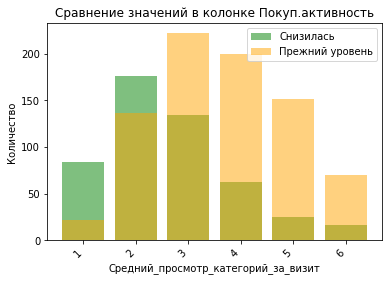

In [17]:
e_d_a_categorical_spl('Средний_просмотр_категорий_за_визит', 'Средний_просмотр_категорий_за_визит', market)

Смотрим статистику: Неоплаченные_продукты_штук_квартал


count   1300.0
mean       2.8
std        2.0
min        0.0
25%        1.0
50%        3.0
75%        4.0
max       10.0
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

Лидеров и аутсайдеров: 


1     261
2     261
3     218
4     197
5     135
0     116
6      44
7      34
8      20
9      10
10      4
Name: Неоплаченные_продукты_штук_квартал, dtype: int64

Посмотрим на графике: 


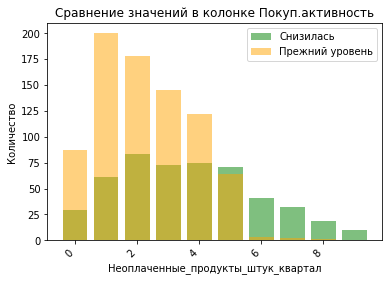

In [18]:
e_d_a_categorical_spl('Неоплаченные_продукты_штук_квартал', 'Неоплаченные_продукты_штук_квартал', market)

Смотрим статистику: Ошибка_сервиса


count   1300.0
mean       4.2
std        2.0
min        0.0
25%        3.0
50%        4.0
75%        6.0
max        9.0
Name: Ошибка_сервиса, dtype: float64

Лидеров и аутсайдеров: 


4    257
3    226
5    208
2    189
6    156
7     92
1     74
8     66
0     17
9     15
Name: Ошибка_сервиса, dtype: int64

Посмотрим на графике: 


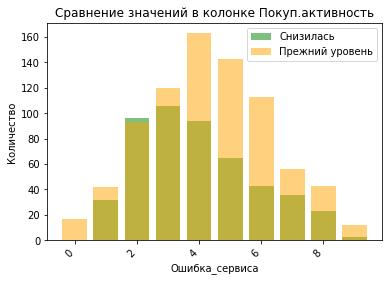

In [19]:
e_d_a_categorical_spl('Ошибка_сервиса', 'Ошибка_сервиса', market)

Смотрим статистику: Страниц_за_визит


count   1300.0
mean       8.2
std        4.0
min        1.0
25%        5.0
50%        8.0
75%       11.0
max       20.0
Name: Страниц_за_визит, dtype: float64

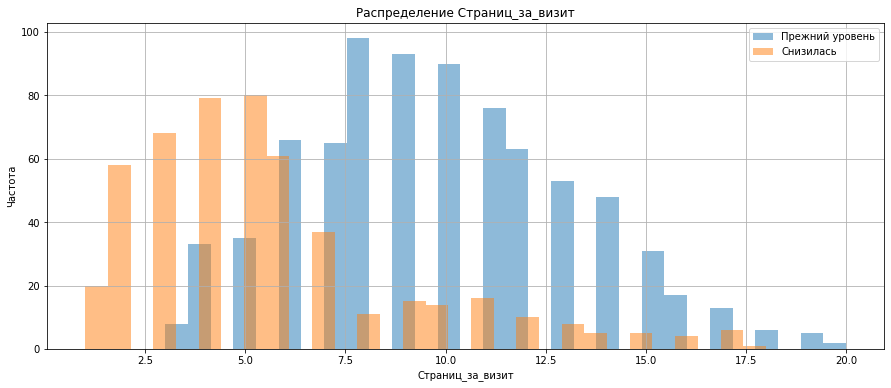

<Figure size 1080x288 with 0 Axes>

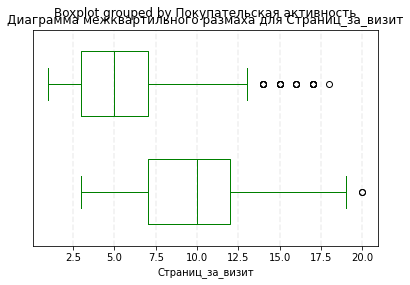


 Страниц_за_визит находится в диапазоне от 1.00 до 20.00, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 11.0 
 
 Всего значений отличных от 0: 1300.0. 
 1Q = 5.0, 
 3Q = 11.0, 
 Межквартильный размах = 6.0,


In [20]:
e_d_a_spl('Страниц_за_визит', 'Страниц_за_визит', market)

Смотрим статистику: Покупательская активность


count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: Покупательская активность, dtype: object

Лидеров и аутсайдеров: 


Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

Посмотрим на графике: 


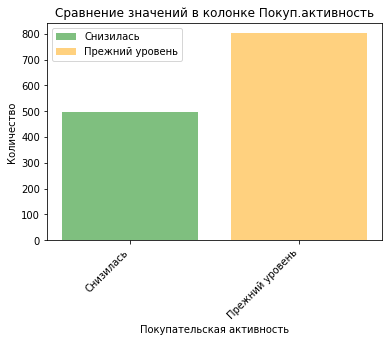

In [21]:
e_d_a_categorical_spl('Покупательская активность', 'Покупательская активность', market)

Смотрим статистику: Тип сервиса


count         1300
unique           2
top       стандарт
freq           924
Name: Тип сервиса, dtype: object

Лидеров и аутсайдеров: 


стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

Посмотрим на графике: 


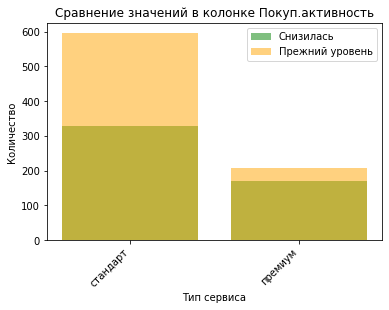

In [22]:
e_d_a_categorical_spl('Тип сервиса', 'Тип сервиса', market)

Смотрим статистику: Разрешить сообщать


count     1300
unique       2
top         да
freq       962
Name: Разрешить сообщать, dtype: object

Лидеров и аутсайдеров: 


да     962
нет    338
Name: Разрешить сообщать, dtype: int64

Посмотрим на графике: 


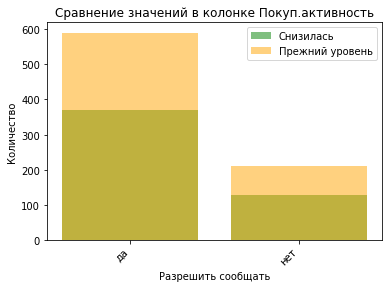

In [23]:
e_d_a_categorical_spl('Разрешить сообщать', 'Разрешить сообщать', market)

Смотрим статистику: Популярная_категория


count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: Популярная_категория, dtype: object

Лидеров и аутсайдеров: 


Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

Посмотрим на графике: 


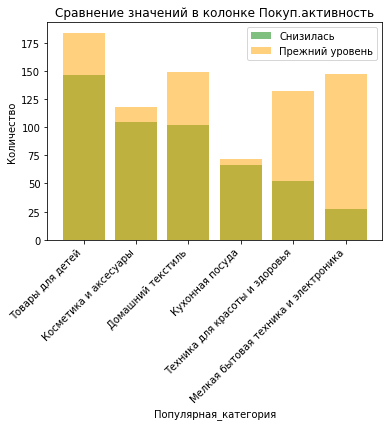

In [24]:
e_d_a_categorical_spl('Популярная_категория', 'Популярная_категория', market)

Смотрим статистику: Период


count                 3900
unique                   3
top       предыдущий_месяц
freq                  1300
Name: Период, dtype: object

Лидеров и аутсайдеров: 


предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: Период, dtype: int64

Посмотрим на графике: 


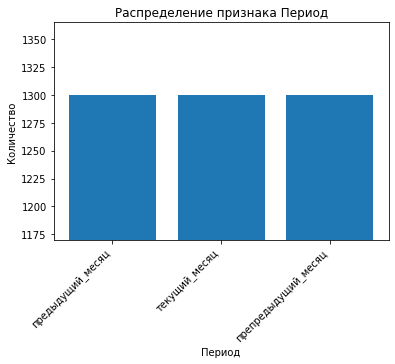

In [25]:
e_d_a_categorical('Период', 'Период', market_money)

Смотрим статистику: Выручка


count     3900.0
mean      5025.7
std       1777.7
min          0.0
25%       4590.1
50%       4957.5
75%       5363.0
max     106862.2
Name: Выручка, dtype: float64

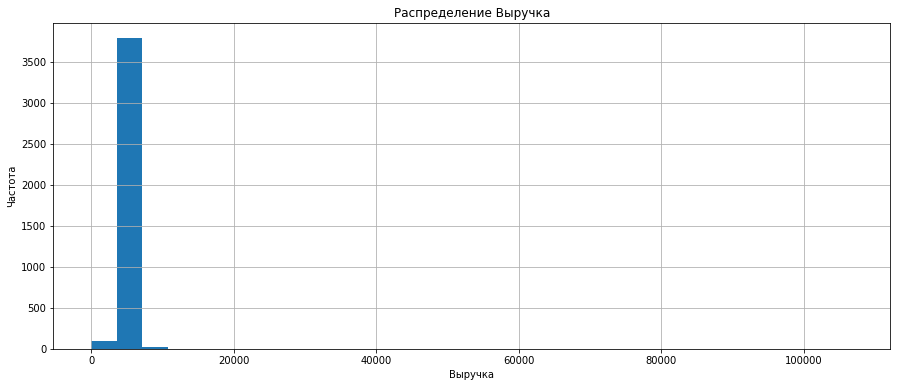

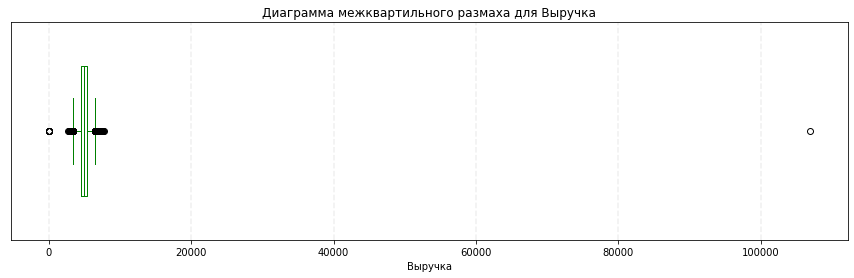


 Выручка находится в диапазоне от 0.00 до 106862.20, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 5363.0 
 
 Всего значений отличных от 0: 3894.0. 
 1Q = 4590.1, 
 3Q = 5363.0, 
 Межквартильный размах = 772.9,


In [26]:
e_d_a('Выручка', 'Выручка', market_money)

In [27]:
market_money[market_money['Выручка']>20000]['id']

98    215380
Name: id, dtype: int64

Смотрим статистику: Выручка


count   3893.0
mean    5007.3
std      679.7
min     2758.7
25%     4592.0
50%     4959.0
75%     5363.0
max     7799.4
Name: Выручка, dtype: float64

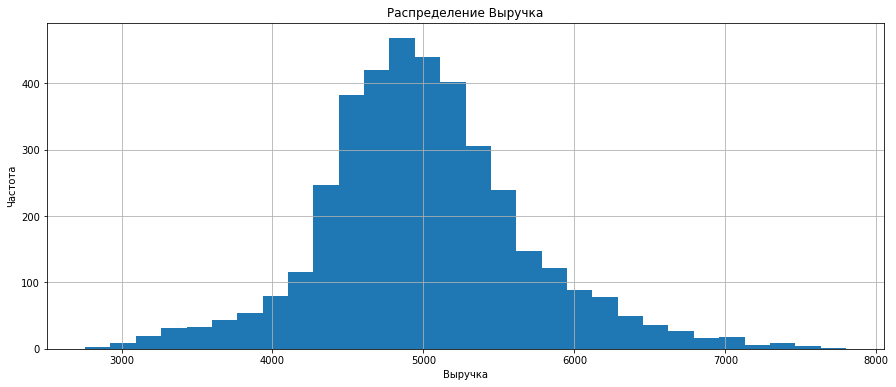

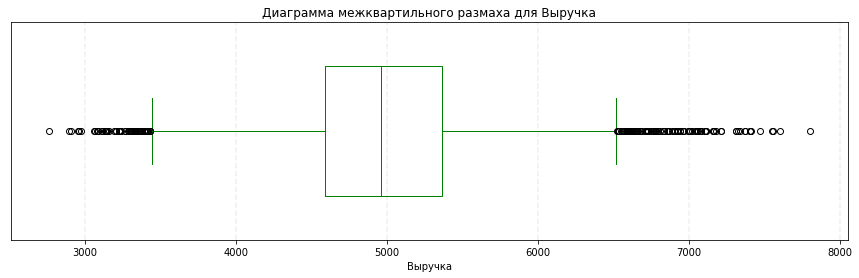


 Выручка находится в диапазоне от 2758.70 до 7799.40, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 5363.0 
 
 Всего значений отличных от 0: 3893.0. 
 1Q = 4592.0, 
 3Q = 5363.0, 
 Межквартильный размах = 771.0,


In [28]:
market_money = market_money[(market_money['Выручка']>0)&(market_money['Выручка']<20000)]
e_d_a('Выручка', 'Выручка', market_money)

Смотрим статистику: Период


count                 2600
unique                   2
top       предыдущий_месяц
freq                  1300
Name: Период, dtype: object

Лидеров и аутсайдеров: 


предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

Посмотрим на графике: 


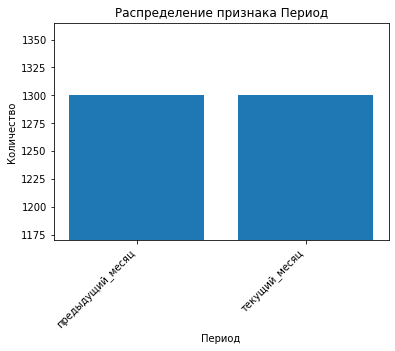

In [29]:
e_d_a_categorical('Период', 'Период', market_time)

Смотрим статистику: Прибыль


count   1300.0
mean       4.0
std        1.0
min        0.9
25%        3.3
50%        4.0
75%        4.7
max        7.4
Name: Прибыль, dtype: float64

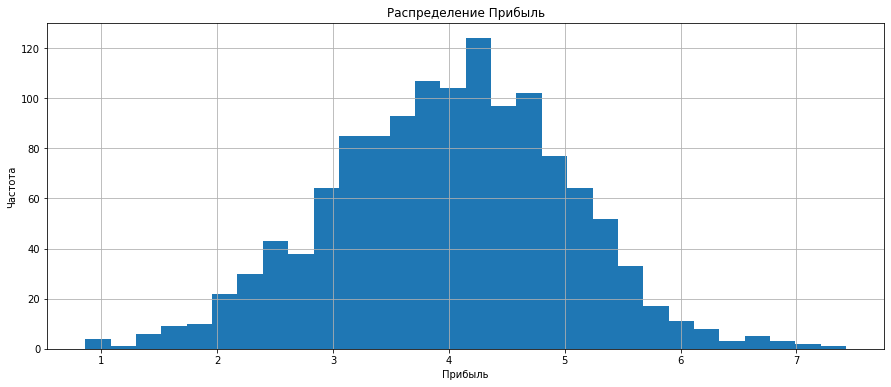

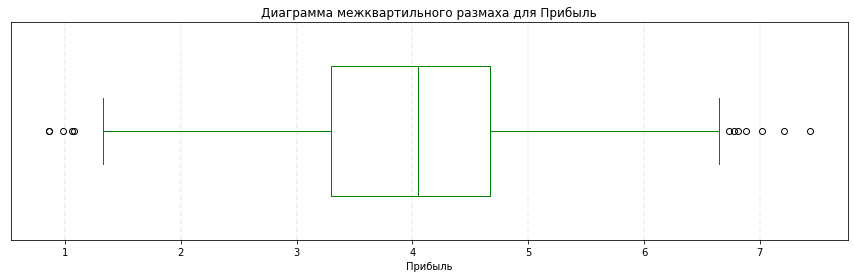


 Прибыль находится в диапазоне от 0.86 до 7.43, посмотрим как распределяются данные, видим на графике выше:
75% объектов находятся в диапазоне до 4.7 
 
 Всего значений отличных от 0: 1300.0. 
 1Q = 3.3, 
 3Q = 4.7, 
 Межквартильный размах = 1.4,


In [30]:
e_d_a('Прибыль', 'Прибыль', money)

**Объединяем**

In [31]:
print(f'Количество строк до объединения {len(market)}')
pivot_money = market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum').reset_index()

pivot_time = market_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()

df = pd.merge(market, pivot_money, on='id', how='left')
df = pd.merge(df, pivot_time, on='id', how='left')

df.rename(columns={'предыдущий_месяц_x': 'предыдущий_месяц_выручка'}, inplace=True)
df.rename(columns={'текущий_месяц_x': 'текущий_месяц_выручка'}, inplace=True)
df.rename(columns={'предыдущий_месяц_y': 'предыдущий_месяц_минут'}, inplace=True)
df.rename(columns={'текущий_месяц_y': 'текущий_месяц_минут'}, inplace=True)

print(f'Количество строк после объединения {len(df)}')
df = df[(df['предыдущий_месяц_выручка']>0) & (df['текущий_месяц_выручка'])>0]
print(f'Количество строк после фильтра {len(df)}')
display(df.sample(10))

Количество строк до объединения 1300
Количество строк после объединения 1300
Количество строк после фильтра 1296


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
1263,216611,Прежний уровень,стандарт,да,3.9,4,515,0.1,Мелкая бытовая техника и электроника,3,0,2,10,4751.0,4951.0,5060.4,9,17
519,215867,Прежний уровень,стандарт,да,5.4,4,777,0.2,Техника для красоты и здоровья,2,3,6,14,5141.0,5313.0,5420.5,13,14
34,215382,Снизилась,стандарт,да,4.6,4,330,0.9,Техника для красоты и здоровья,6,2,7,6,5545.5,4824.0,6403.5,15,8
896,216244,Прежний уровень,премиум,нет,4.2,3,452,0.2,Косметика и аксесуары,4,2,4,10,4573.0,5047.0,4292.2,12,16
479,215827,Снизилась,стандарт,да,4.6,3,641,0.3,Косметика и аксесуары,4,1,5,6,5108.5,4900.0,5419.2,21,11
413,215761,Прежний уровень,стандарт,нет,5.7,4,565,0.1,Домашний текстиль,5,1,4,12,4252.0,5023.0,3713.8,12,18
376,215724,Снизилась,стандарт,нет,2.4,3,731,0.2,Домашний текстиль,3,3,3,4,4395.5,4226.0,4849.2,10,11
1159,216507,Прежний уровень,стандарт,нет,3.7,3,595,0.9,Товары для детей,5,4,5,15,4971.0,5212.0,5310.3,18,15
36,215384,Снизилась,стандарт,да,4.0,4,1020,0.3,Косметика и аксесуары,2,3,8,3,3584.0,4226.0,4010.4,11,12
1245,216593,Прежний уровень,стандарт,да,5.7,5,514,0.3,Домашний текстиль,4,5,5,11,5150.5,5053.0,5365.0,18,19


## Корреляционный анализ

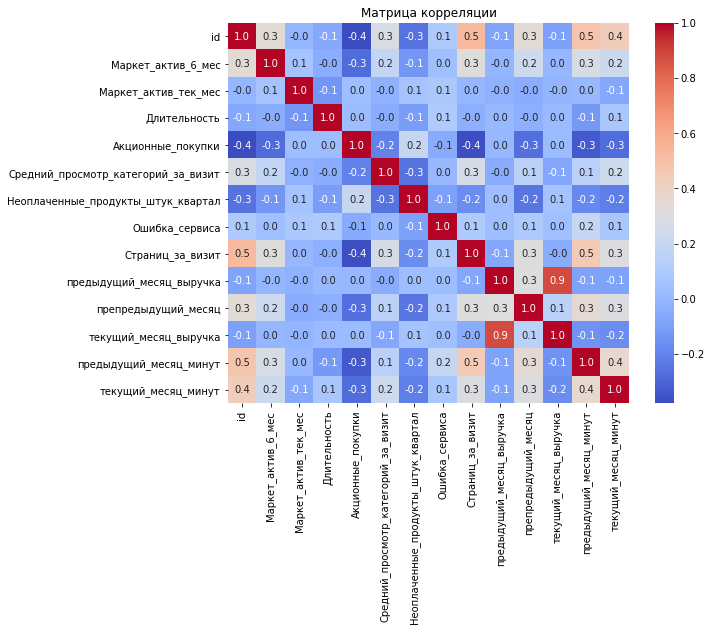

In [32]:
correlation_matrix = df[df.select_dtypes(include='number').columns.tolist()].corr(method='spearman')
plt.figure(figsize=(9, 7))
  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Матрица корреляции')
plt.show()

**Вывод:**
Достаточно высокого уровня корреляции для того, что бы можно было говорить о мультиколлинеарности, не наблюдается. 

## Построение моделей

In [34]:
df['Покупательская активность'] = df['Покупательская активность'].map(
    {'Снизилась': 1, 'Прежний уровень': 0}).astype('int')

Так как нам нужно найти не просто долю правильно опеределенных значений, но и отношение правильно определенных значений, то наиболее близкая по значению метрика это ROC-AUC, которую мы будем использовать для подбора модели, т.к. согласно Wiki: Кривая ROC - это график зависимости истинной положительной частоты (TPR) от частоты ложных срабатываний (FPR) при каждом пороговом значении.

Что нам наиболее оптимально подходит, исходя из условий задачи.

In [35]:
RANDOM_STATE = 42
TEST_SIZE = 0.25


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Покупательская активность', 'id'], axis=1),
    df['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская активность'])

# создаём списки с названиями признаков
ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = [
    'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
    'Акционные_покупки', 
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
    'Страниц_за_визит', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка',
    'предыдущий_месяц_минут', 'текущий_месяц_минут'
    ]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 25),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10],
        'models__gamma': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                        

Площадь ROC-кривой: 0.9114940381838925


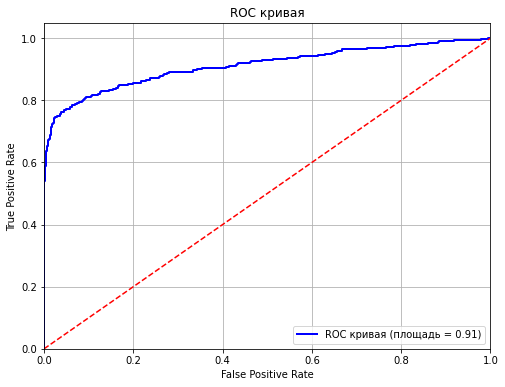

In [36]:
# Получение вероятностей классов с помощью predict_proba()
probabilities = randomized_search.best_estimator_.predict_proba(df.drop(['Покупательская активность', 'id'], axis=1))

# Вероятности класса 1
probabilities_one = probabilities[:, 1]
# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(df['Покупательская активность'], probabilities_one)
roc_auc = roc_auc_score(df['Покупательская активность'], probabilities_one)
# Вычисление ROC AUC
print('Площадь ROC-кривой:', roc_auc)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC кривая (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Анализ важности признаков

In [37]:
random_search = randomized_search
random_search.best_estimator_[1]

LogisticRegression(C=8, penalty='l1', random_state=42, solver='liblinear')

In [38]:
best_params = randomized_search.best_params_
best_model = pipe_final.set_params(**best_params)
best_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(stra...
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_минут',
                                                   'текущий_месяц_минут'])])),
                ('models',
                 LogisticRegression(C=8, penalty='l1', random_state=42,
                                    solver='liblinear'))])

Анализируем важность признаков в лучшей модели.


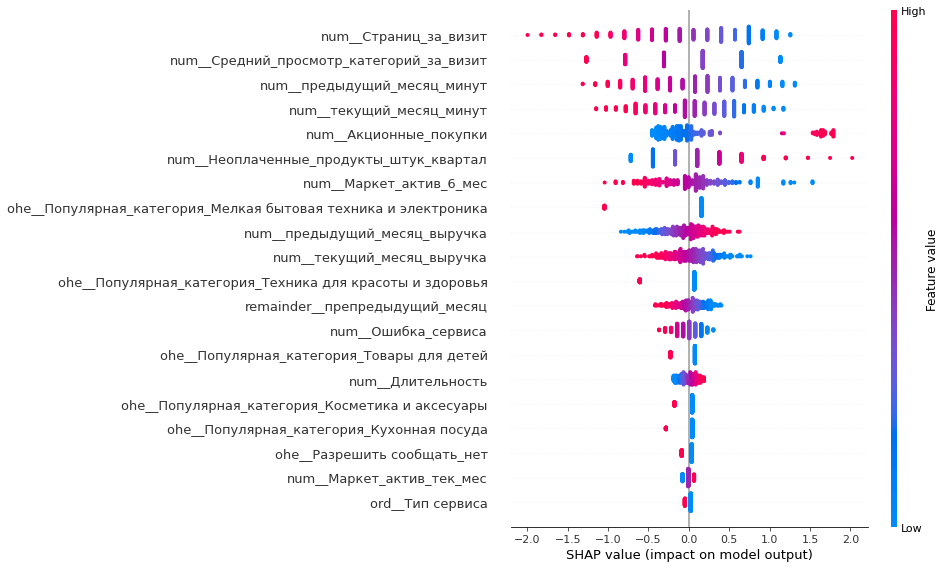

In [48]:
print('Анализируем важность признаков в лучшей модели.')

X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

shap_values = explainer(X_test_2)

# display(shap.plots.bar(shap_values, max_display=22))
shap.plots.beeswarm(shap_values, max_display=22) 


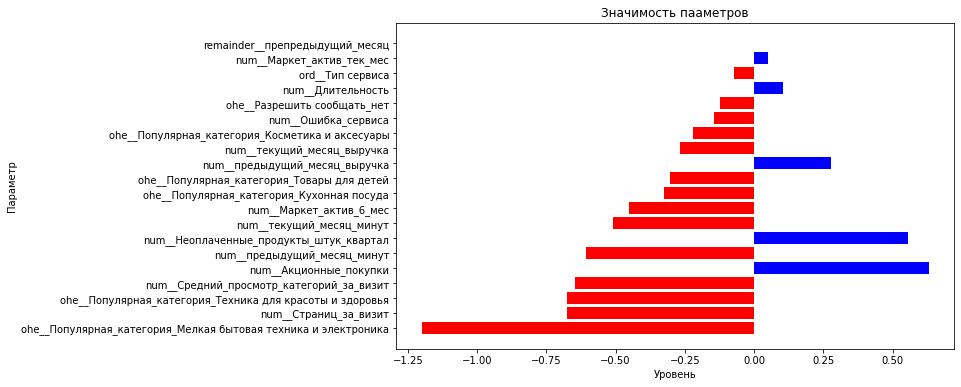

In [40]:
best_model = randomized_search.best_estimator_

if best_model.named_steps['models'].__class__.__name__ == 'LogisticRegression':
    coefficients = best_model.named_steps['models'].coef_[0]
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_coefficients_df['Absolute_Coefficient'] = np.abs(feature_coefficients_df['Coefficient'])
    feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
    plt.figure(figsize=(10, 6))

    colors = ['red' if c < 0 else 'blue' for c in feature_coefficients_df['Coefficient']]
    
    plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'], color=colors)
    plt.xlabel('Уровень')
    plt.ylabel('Параметр')
    plt.title('Значимость пааметров')
    plt.show()
else:
    print("Модель не является логистической регрессией.")

**Выводы:**
1. Наиболее значимые параметры это если заказывают электронику или технику для красоты и здоровья, то вероятность отмены не большая.
2. Чем больше минут проводит пользователь и чем больше страниц за визит он просматривает, тем больше вероятность, что он не отменит заказ.
3. А вот пользователи покупающие по акциям, имеющиеся неоплаченые покупки за квартиал и длительное время находящиеся на сайте - попадают в группу риска.
4. Посмотрим по группам покупателей детальнее и попробуем разобраться с наиболее значемыми факторами дальше.

## Сегментация покупателей


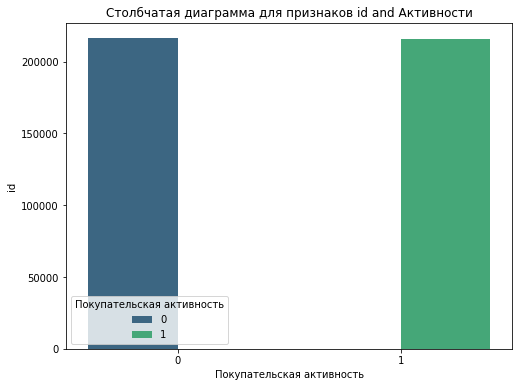

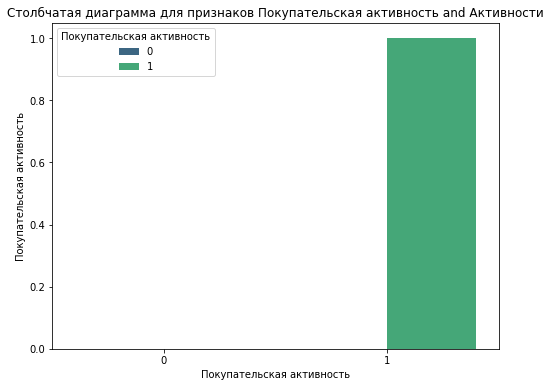

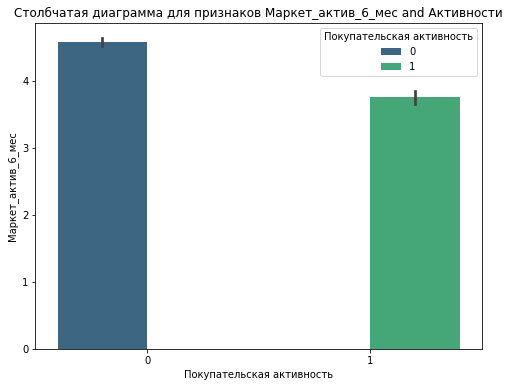

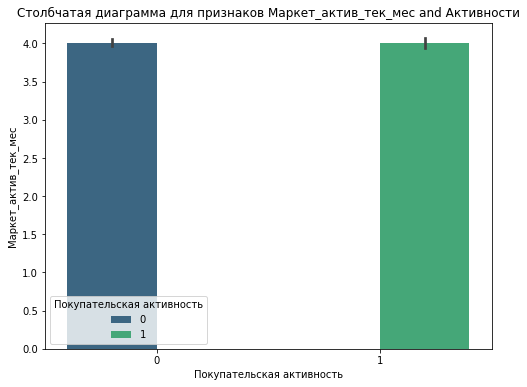

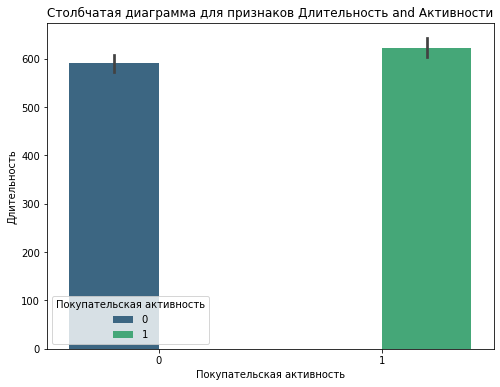

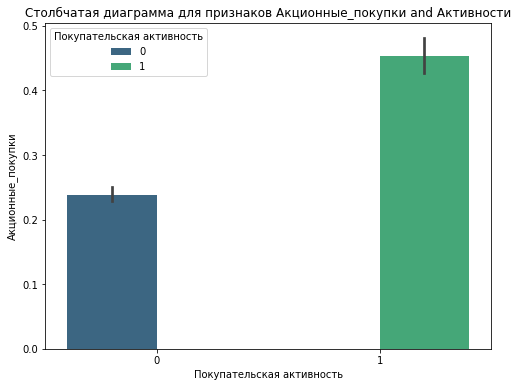

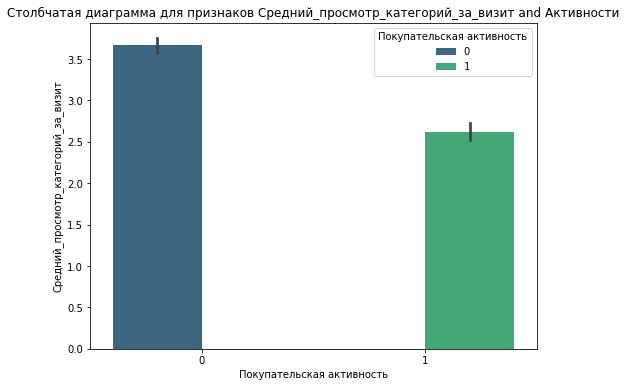

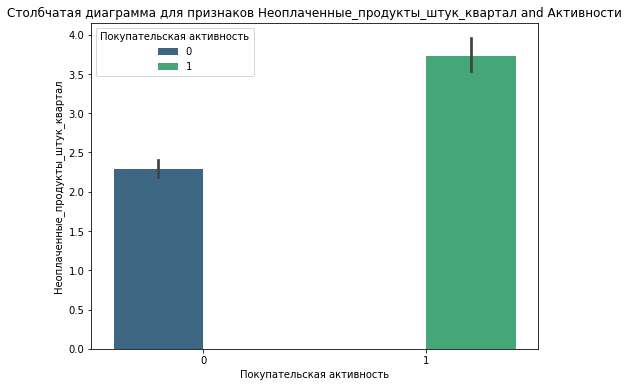

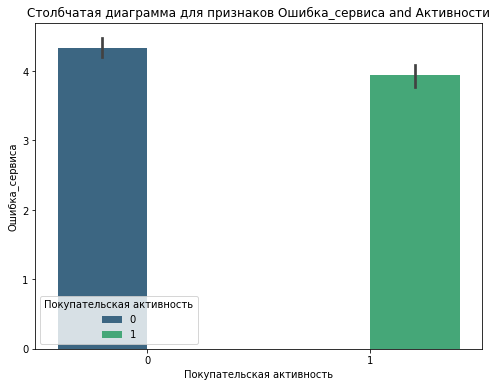

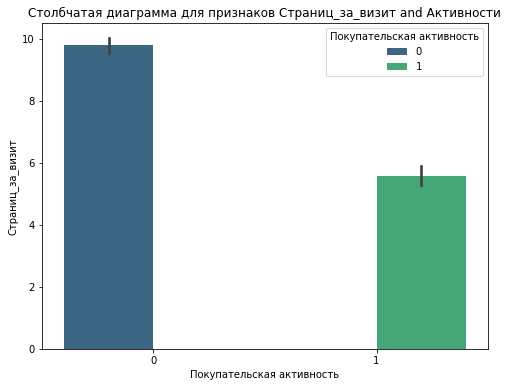

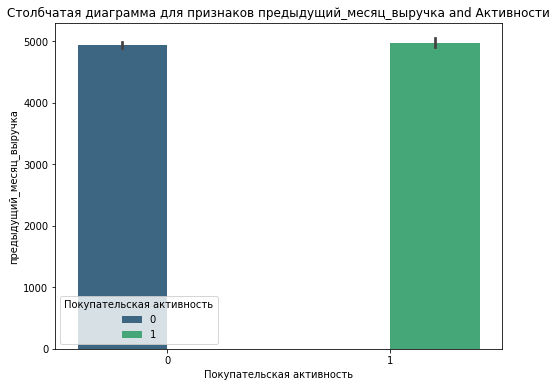

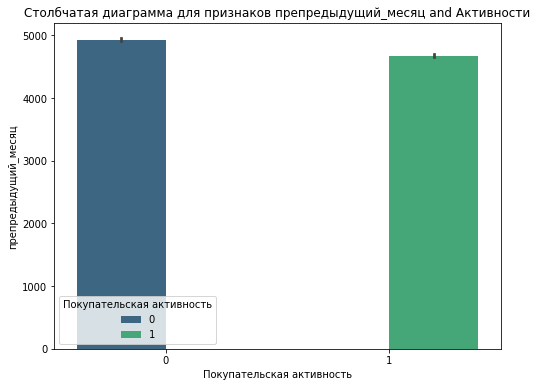

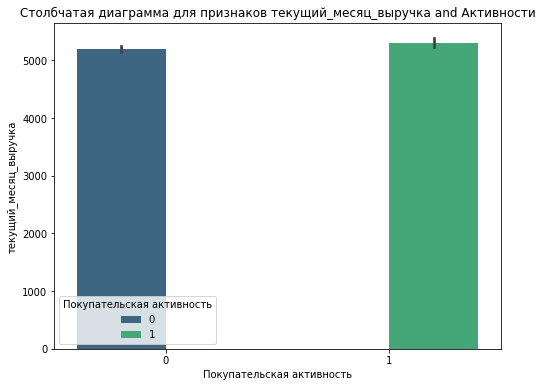

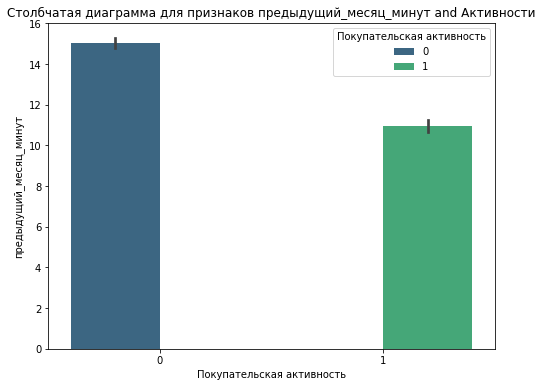

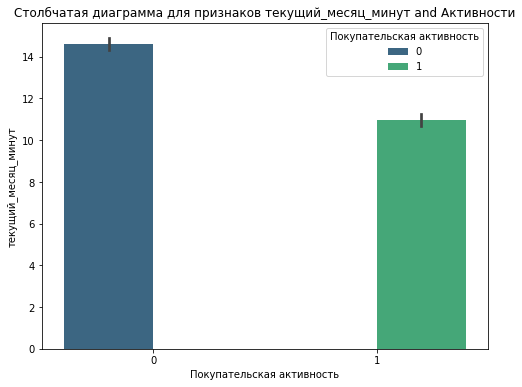

In [41]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

unic_values = df['Покупательская активность'].unique()

for feature in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Покупательская активность', y=feature, hue='Покупательская активность', data=df, palette='viridis')
    plt.xlabel('Покупательская активность')
    plt.ylabel(feature)
    plt.title(f'Столбчатая диаграмма для признаков {feature} and Активности')
    plt.legend(title='Покупательская активность')
    plt.show()

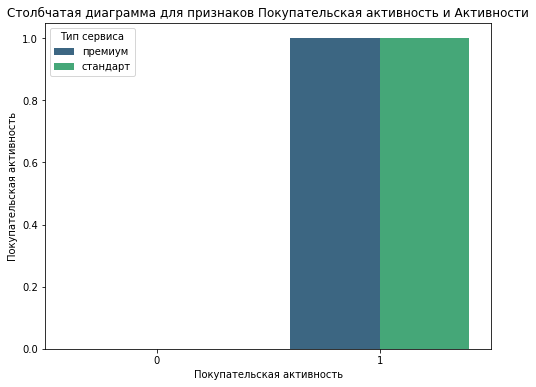

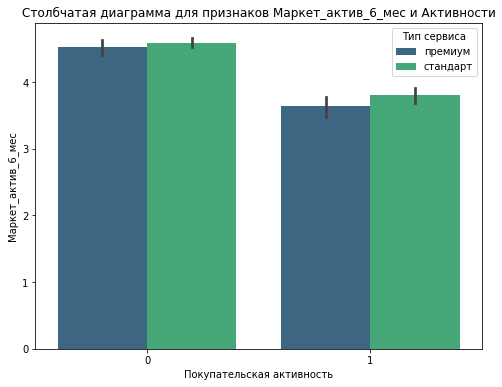

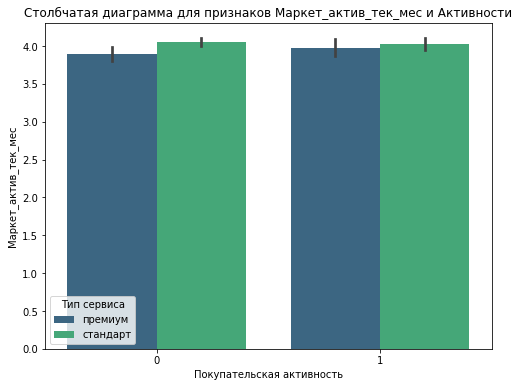

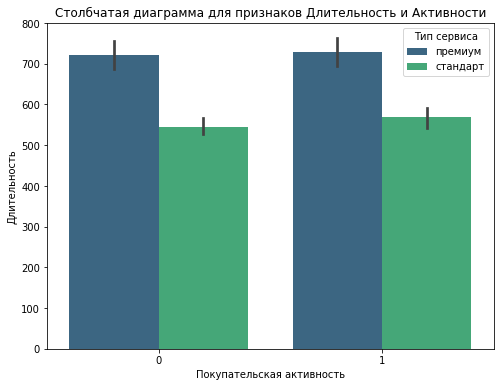

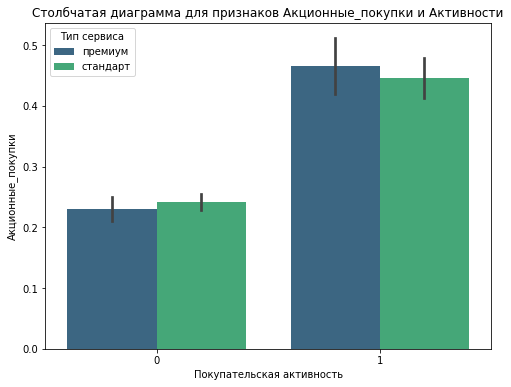

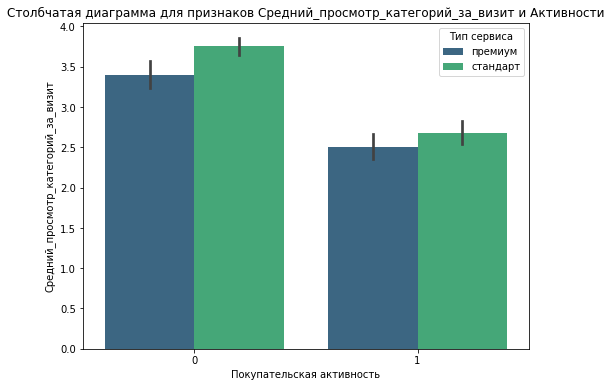

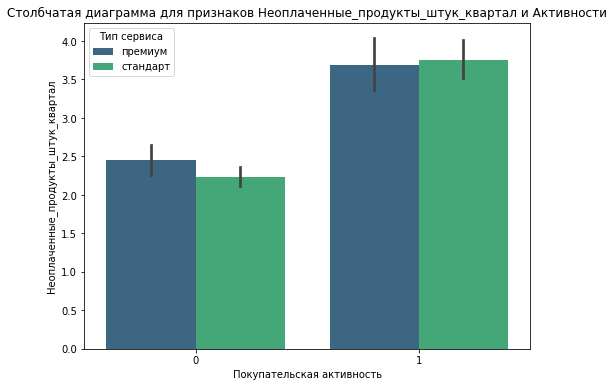

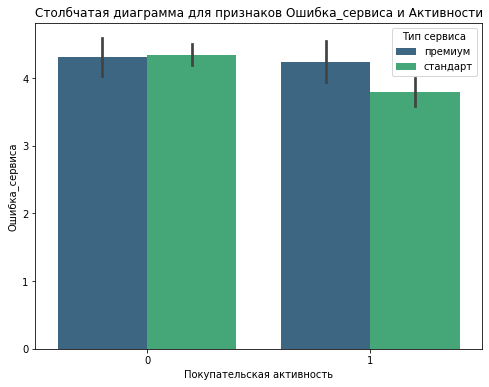

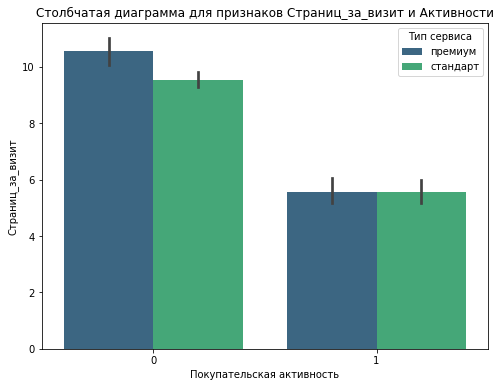

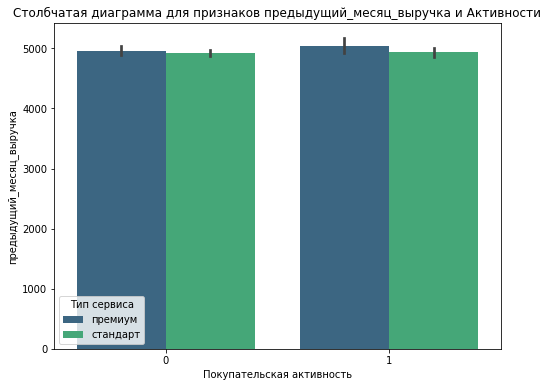

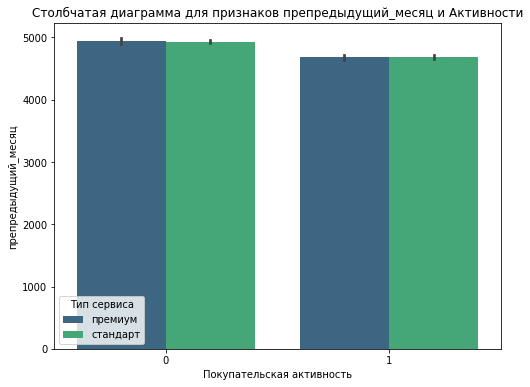

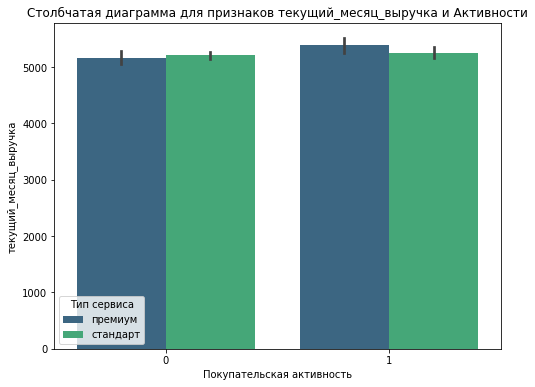

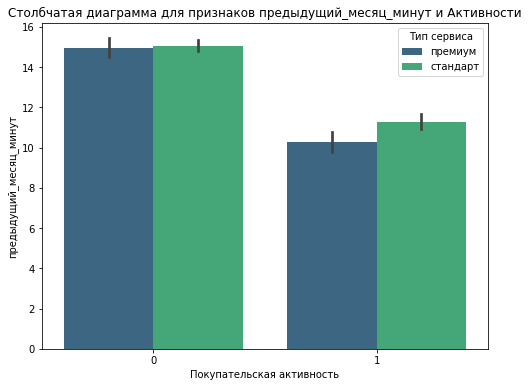

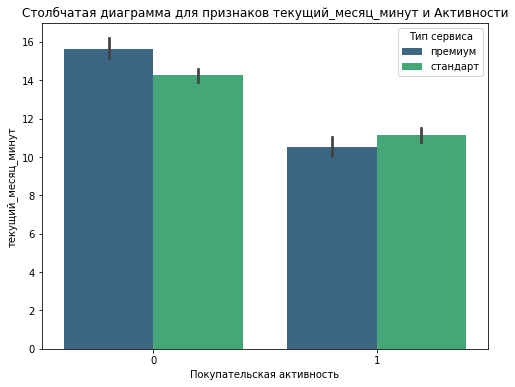

In [42]:
if 'id' in numeric_columns:
    numeric_columns.remove('id')
    
    
for feature in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Покупательская активность', y=feature, hue='Тип сервиса', data=df, palette='viridis')
    plt.xlabel('Покупательская активность')
    plt.ylabel(feature)
    plt.title(f'Столбчатая диаграмма для признаков {feature} и Активности')
    plt.legend(title='Тип сервиса')
    plt.show()


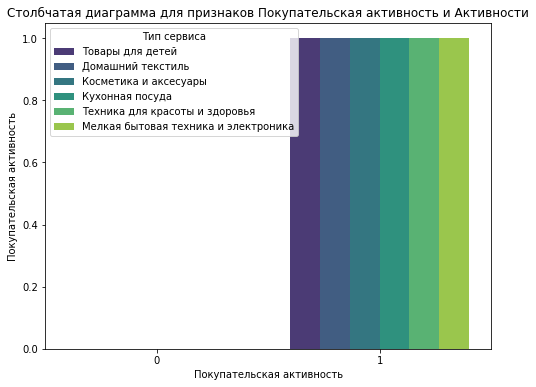

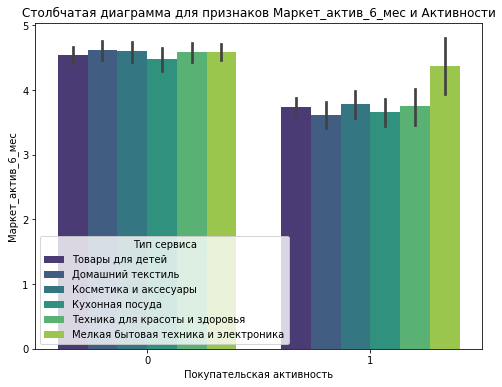

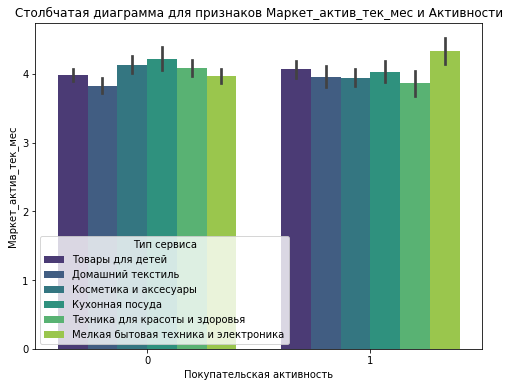

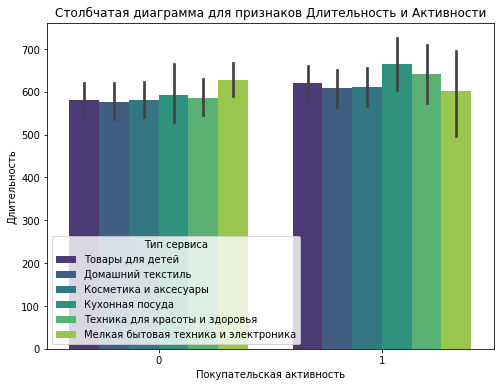

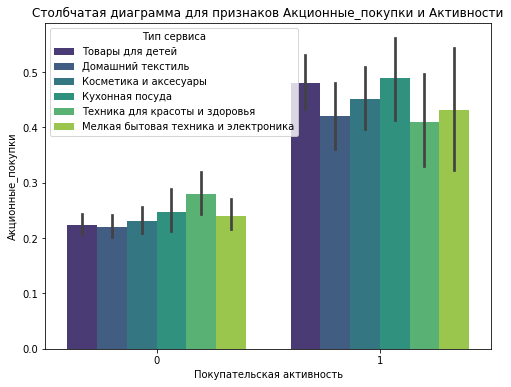

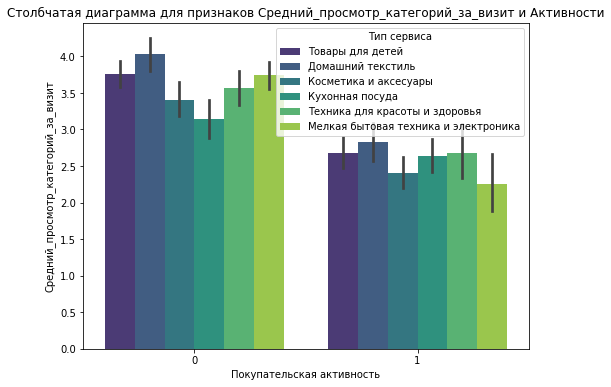

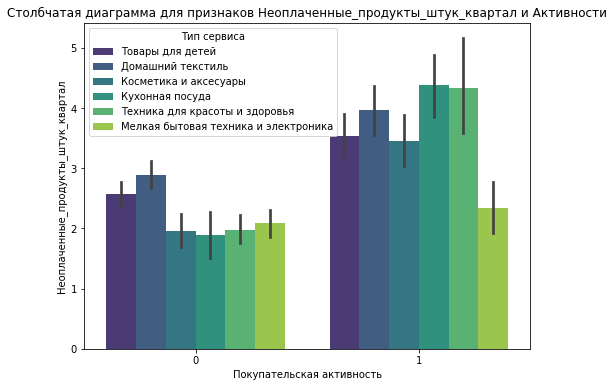

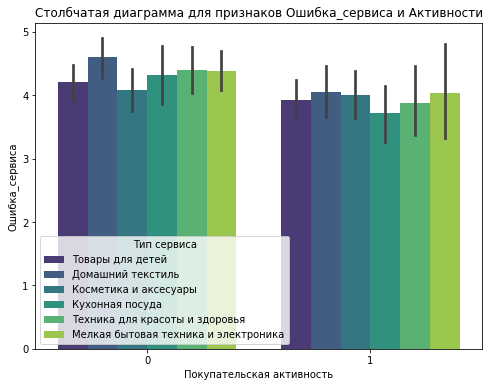

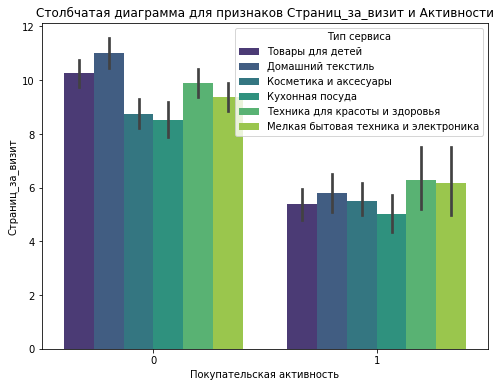

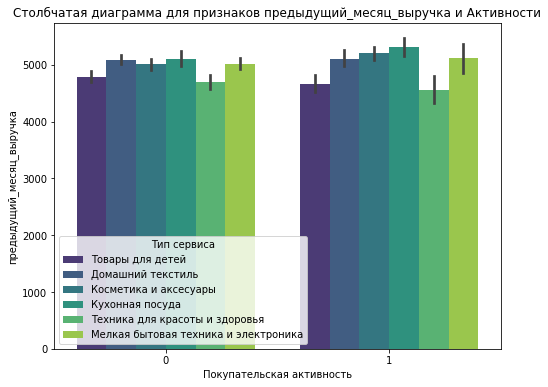

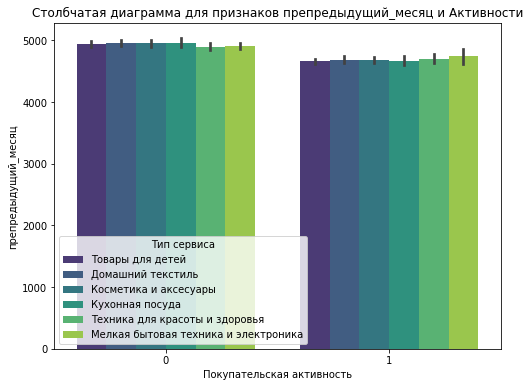

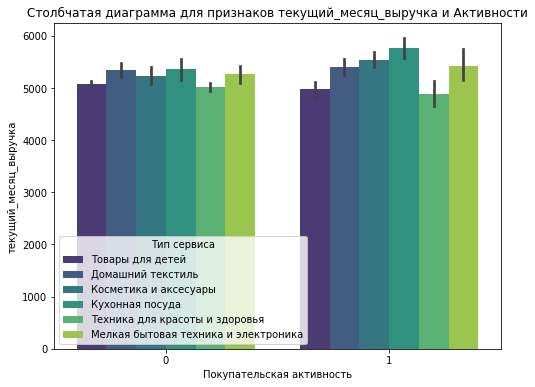

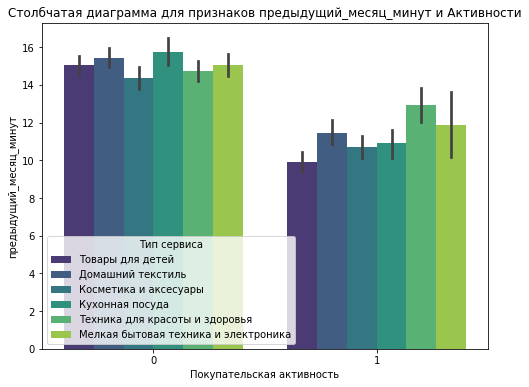

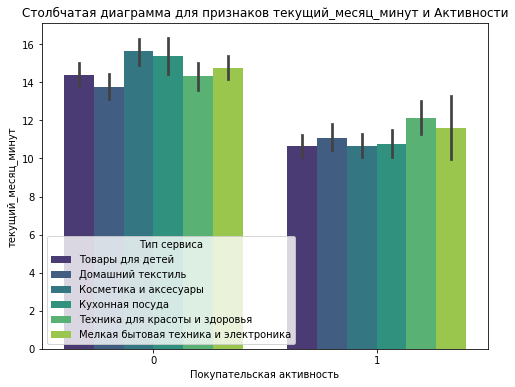

In [43]:
for feature in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Покупательская активность', y=feature, hue='Популярная_категория', data=df, palette='viridis')
    plt.xlabel('Покупательская активность')
    plt.ylabel(feature)
    plt.title(f'Столбчатая диаграмма для признаков {feature} и Активности')
    plt.legend(title='Тип сервиса')
    plt.show()

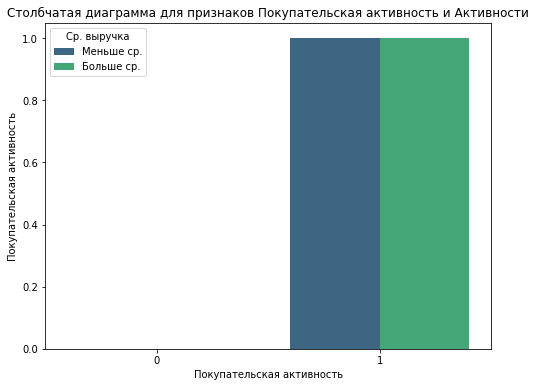

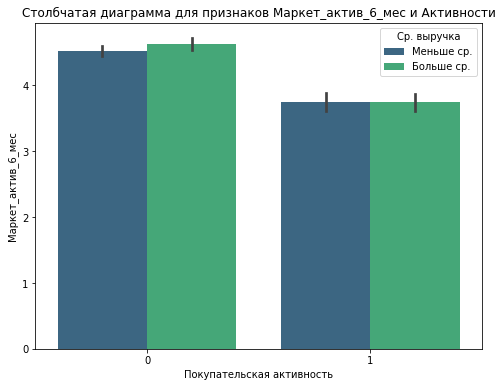

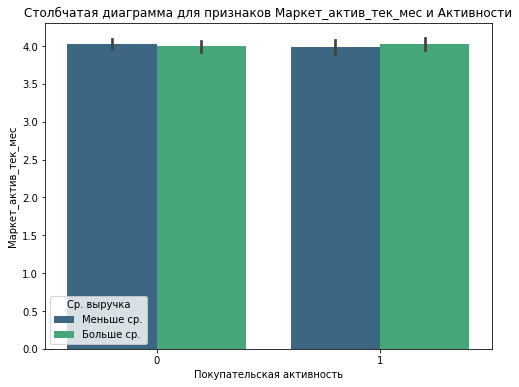

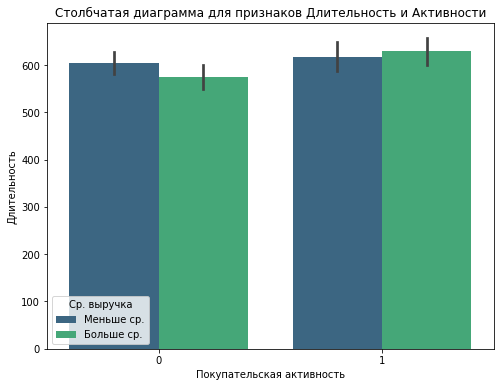

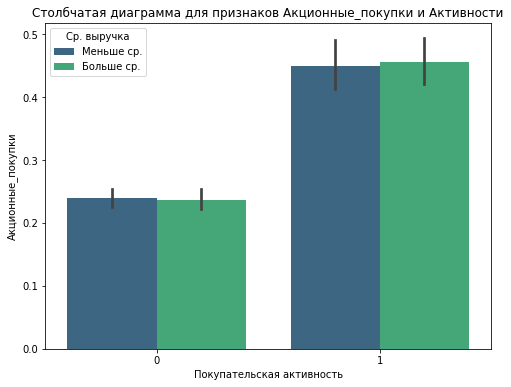

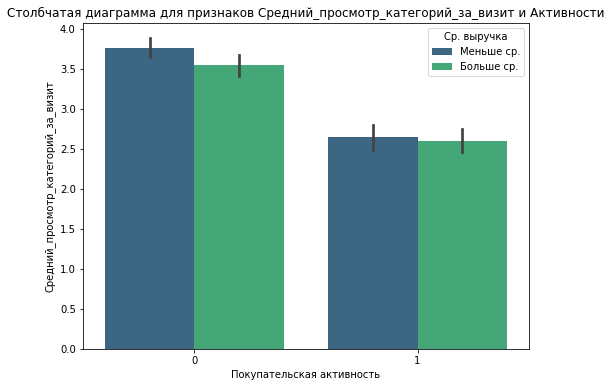

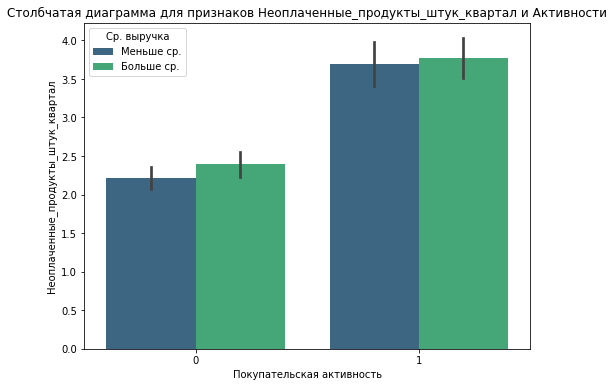

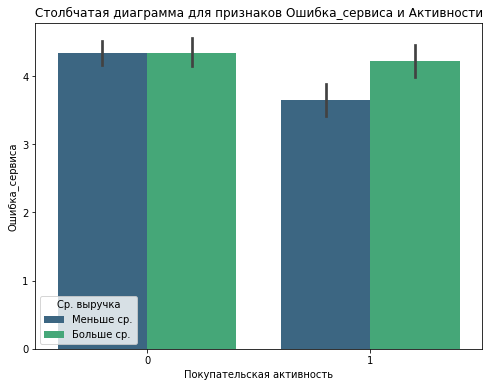

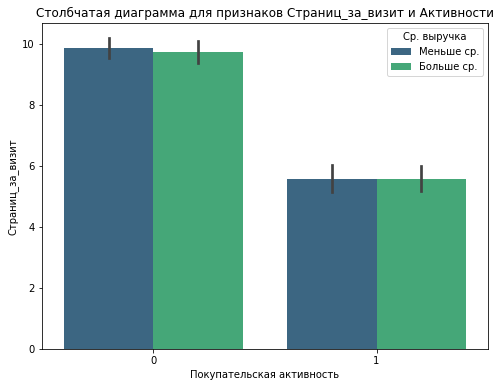

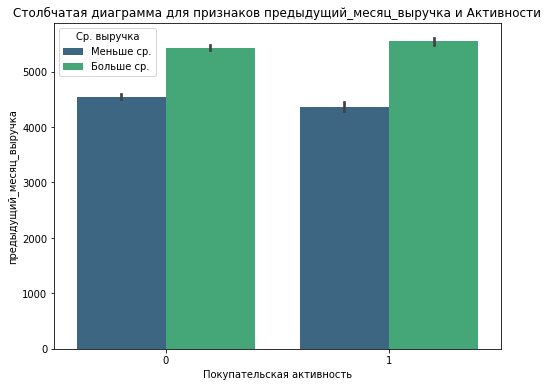

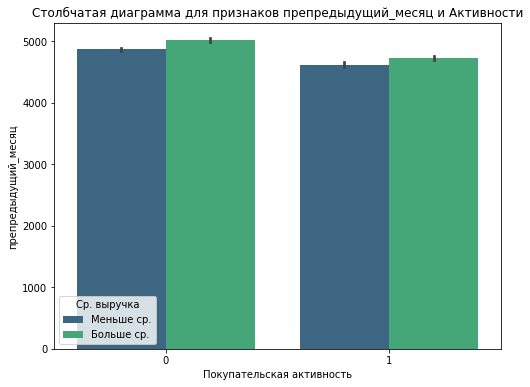

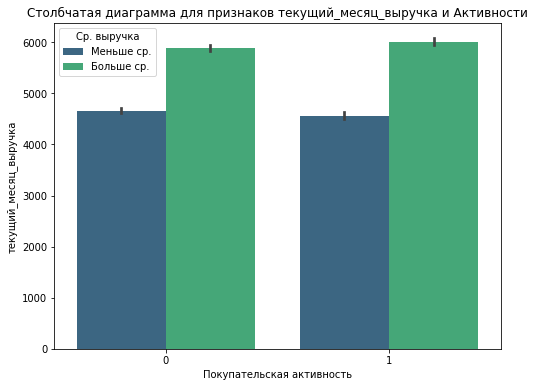

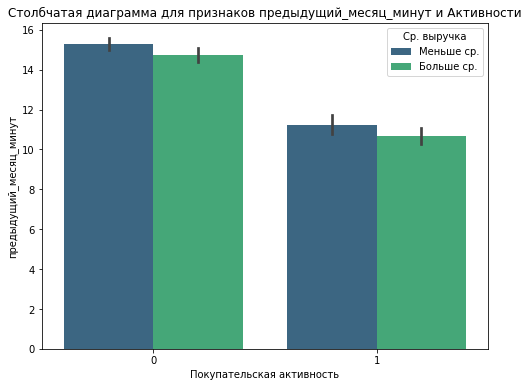

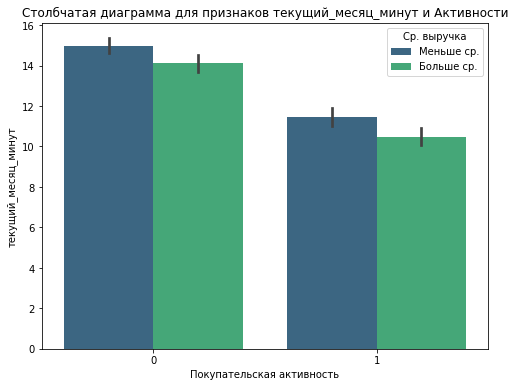

In [44]:
df_w = df.copy()
numeric_columns = df_w.select_dtypes(include='number').columns.tolist()
if 'id' in numeric_columns:
    numeric_columns.remove('id')
    
unic_values = df_w['Покупательская активность'].unique()

df_w['Категория'] = pd.cut(
    df_w['текущий_месяц_выручка'], 
    bins=[-np.inf, df_w['текущий_месяц_выручка'].mean(), np.inf], 
    labels=['Меньше ср.', 'Больше ср.'])
for feature in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Покупательская активность', y=feature, hue='Категория', data=df_w, palette='viridis')
    plt.xlabel('Покупательская активность')
    plt.ylabel(feature)
    plt.title(f'Столбчатая диаграмма для признаков {feature} и Активности')
    plt.legend(title='Ср. выручка')
    plt.show()

Выделим сегмент, для которого отсеим нижние 30% клиентов, которые приносят меньше всего выручки, и при этом у этого сегмента вероятность ухода выше 30%, т.е. это важная для нас группа клиентов.

In [45]:
X = df.drop(['Покупательская активность', 'id'], axis=1)
# y = df['Покупательская активность']
df_new = df.copy()
# Лучшая модель для предсказания
best_model = randomized_search.best_estimator_

# Предсказываем X
predictions = best_model.predict(X)
# Получение вероятностей принадлежности к классам
probabilities = best_model.predict_proba(X)
class_1_probabilities = probabilities[:, 1]
df_new['Предсказанная покупательская активность'] = class_1_probabilities
df_new['Суммарная выручка'] = df_new['предыдущий_месяц_выручка'] + df_new['текущий_месяц_выручка']
# Определение квартилей выручки
quartiles = df_new['Суммарная выручка'].quantile([0.25, 0.5, 0.75])

# Разделение выручки на сегменты на основе квартилей
df_new['Выручка класс'] = pd.qcut(df_new['Суммарная выручка'], 
                                   q=[0, 0.25, 0.75, 1], 
                                   labels=['Ниже среднего', 'Средняя', 'Больше среднего'])
# Выделяем сегмент
df_new['Кластер пользователя'] = 'Низкий риск'
df_new.loc[
    ((df_new['Выручка класс'] == 'Средняя') | (df_new['Выручка класс'] == 'Больше среднего')) &
    (df_new['Предсказанная покупательская активность'] > 0.3), 'Кластер пользователя'
    ] = 'Высокий риск'

df_new.loc[
    ((df_new['Выручка класс'] == 'Средняя') | (df_new['Выручка класс'] == 'Больше среднего')) &
    (df_new['Предсказанная покупательская активность'] <= 0.3), 'Кластер пользователя'
    ] = 'Низкий риск'


df_new.sample(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,Предсказанная покупательская активность,Суммарная выручка,Выручка класс,Кластер пользователя
1127,216475,0,стандарт,да,3.5,3,577,0.2,Техника для красоты и здоровья,3,...,11,6231.0,5454.0,5687.6,16,13,0.1,11918.6,Больше среднего,Низкий риск
921,216269,0,стандарт,да,4.5,4,608,0.2,Техника для красоты и здоровья,5,...,11,3676.0,4598.0,4605.5,18,18,0.0,8281.5,Ниже среднего,Низкий риск
897,216245,0,премиум,да,3.8,3,992,0.2,Кухонная посуда,2,...,15,5319.5,4532.0,6132.0,18,14,0.1,11451.5,Больше среднего,Низкий риск
522,215870,0,стандарт,да,5.7,4,803,0.2,Домашний текстиль,5,...,5,4345.0,4795.0,4085.0,18,11,0.2,8430.0,Ниже среднего,Низкий риск
341,215689,1,стандарт,нет,5.0,4,136,0.3,Товары для детей,3,...,17,4998.0,5230.0,5329.5,11,18,0.1,10327.5,Средняя,Низкий риск


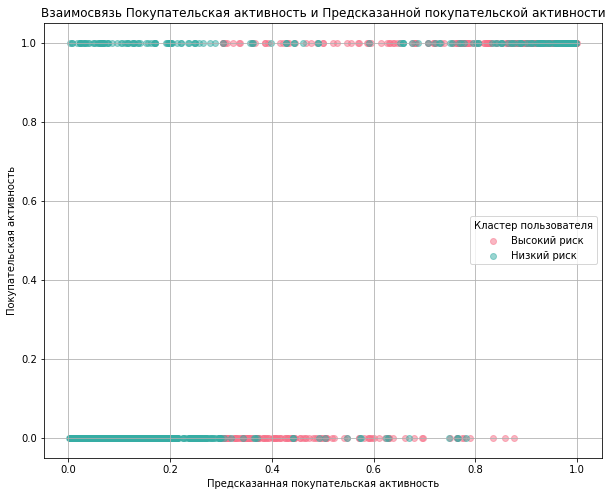

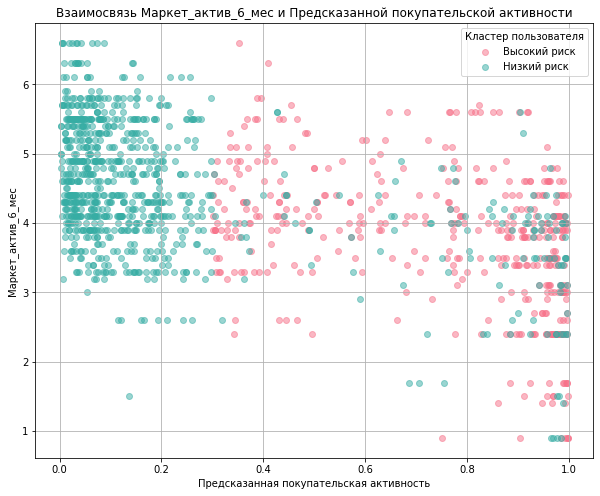

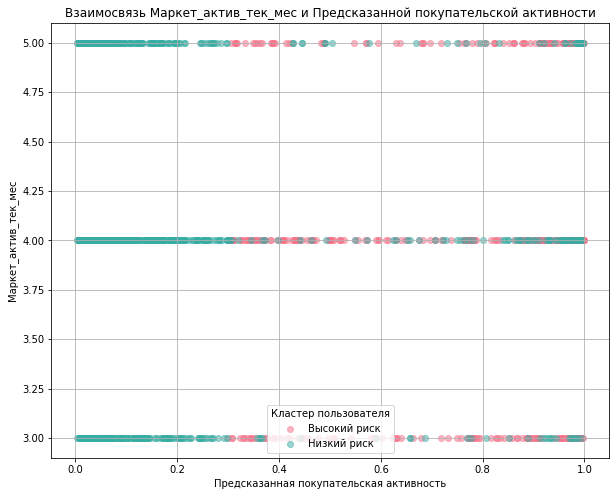

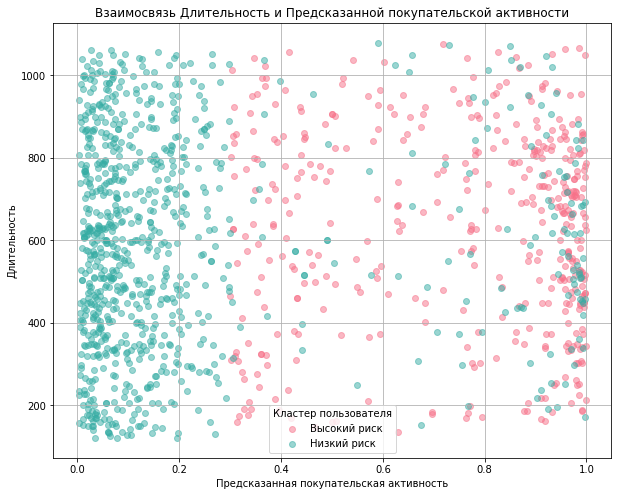

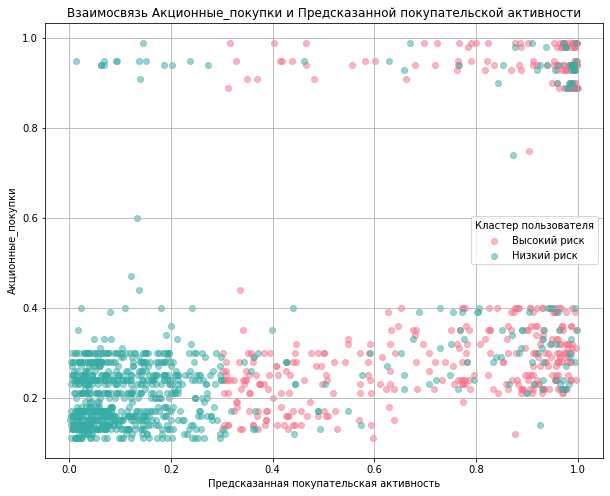

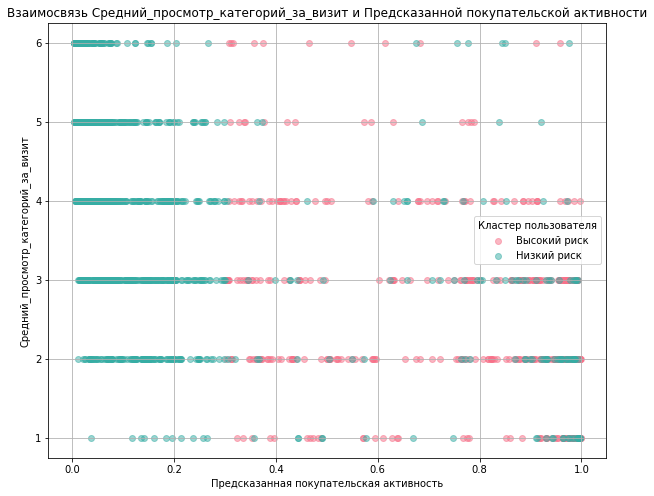

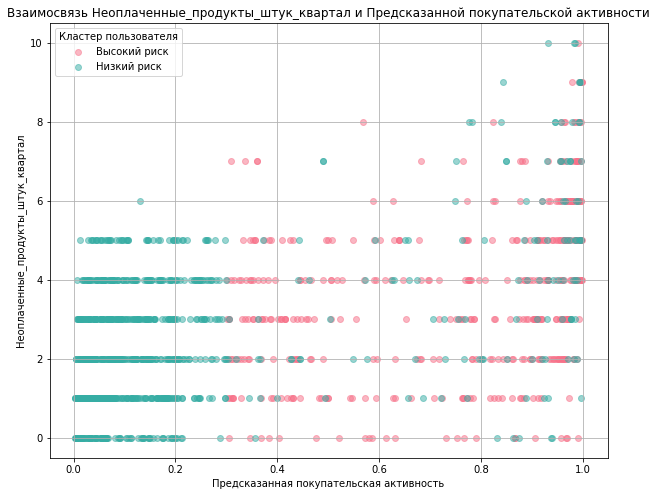

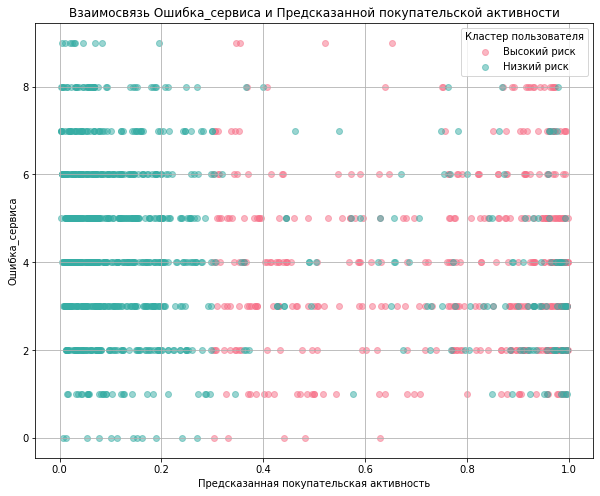

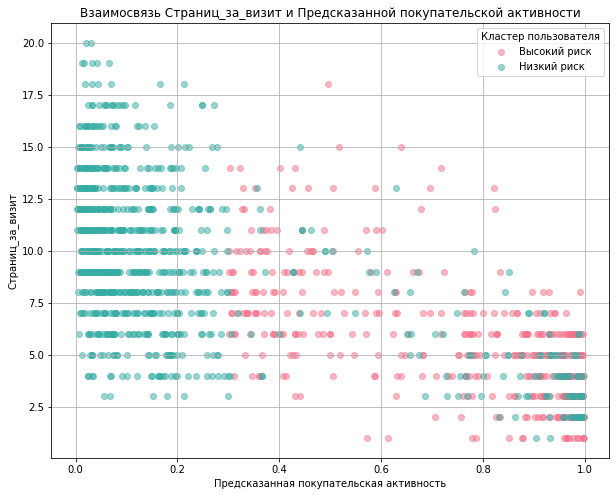

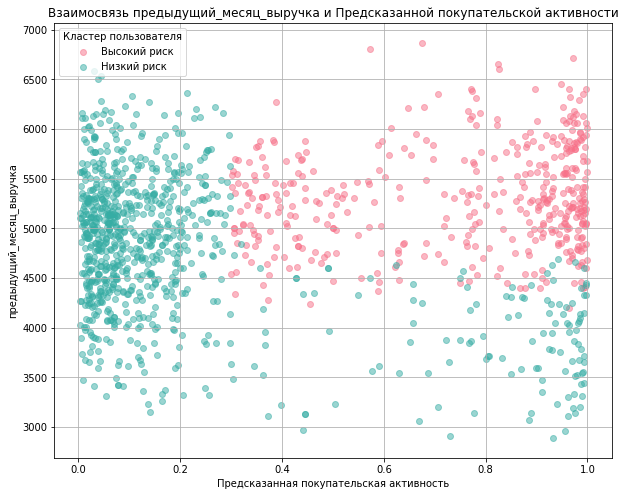

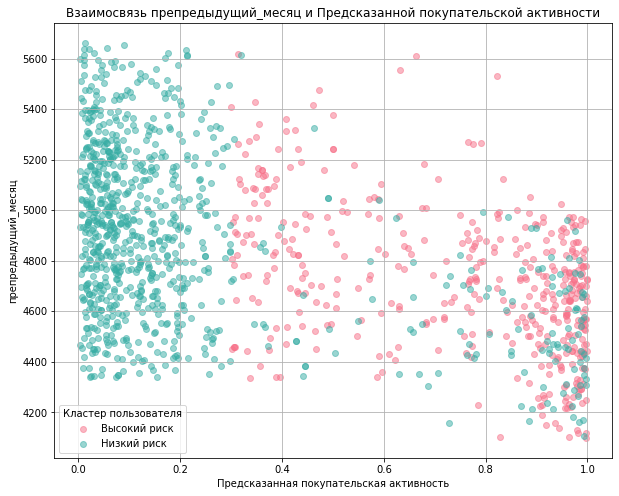

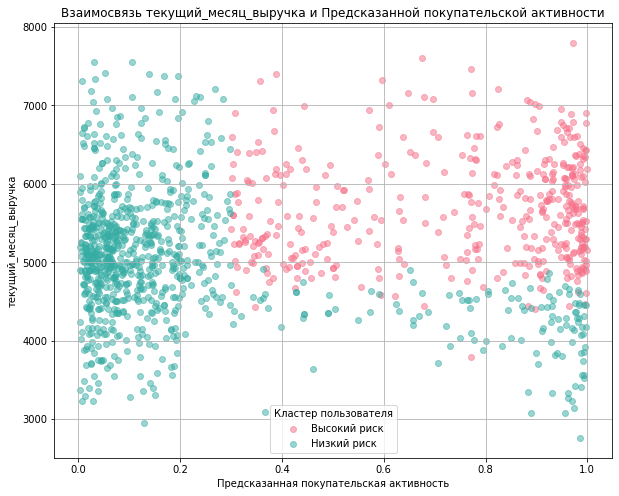

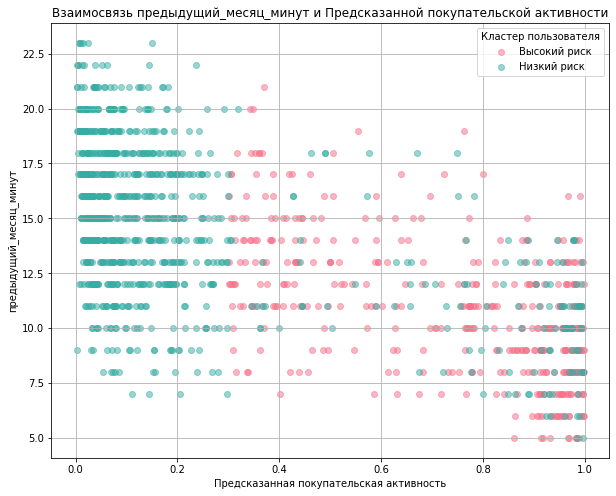

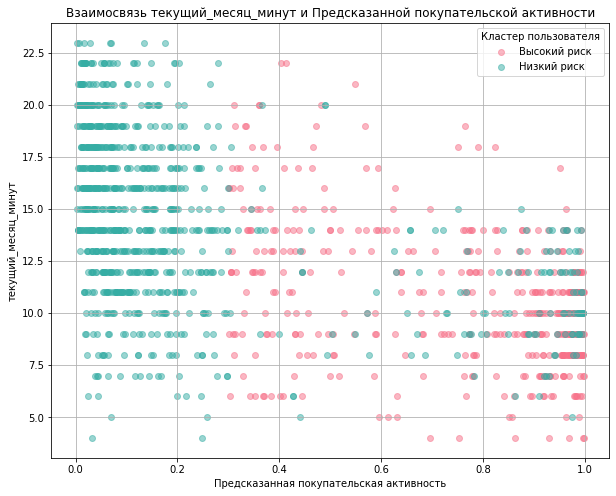

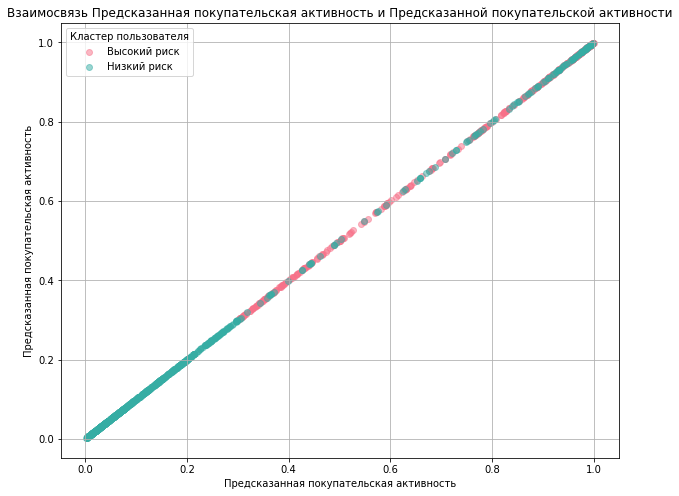

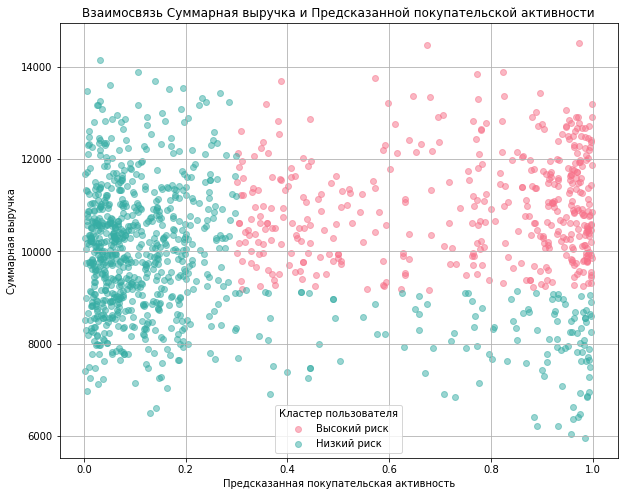

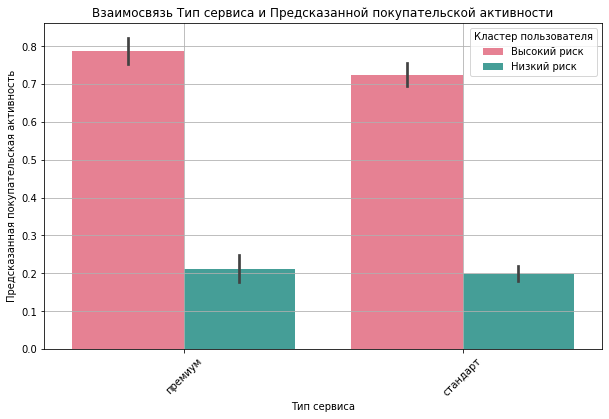

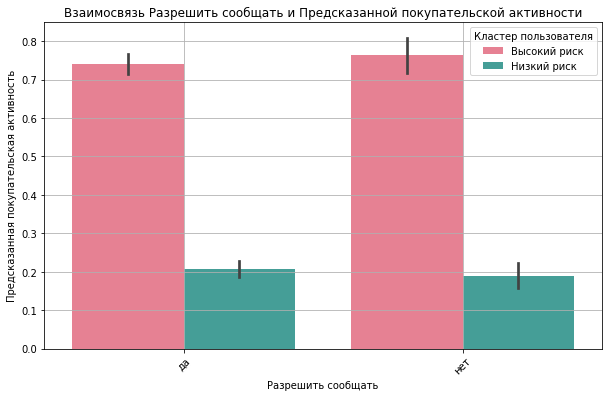

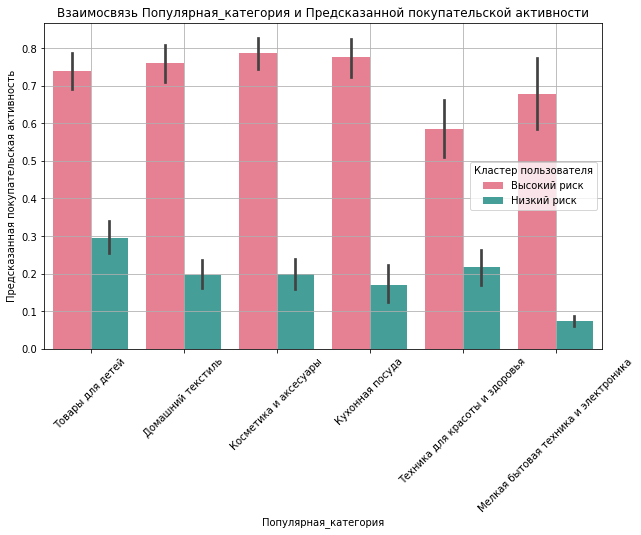

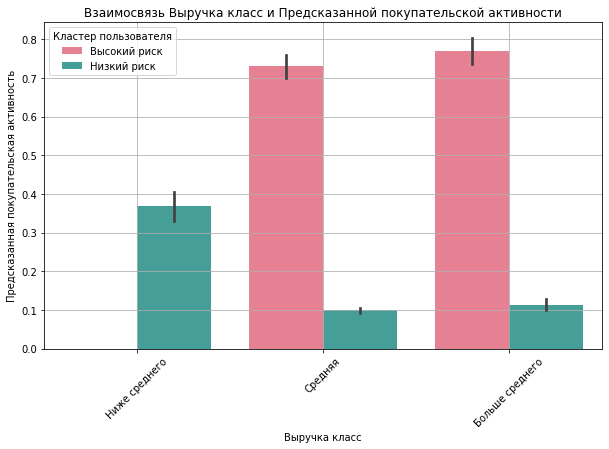

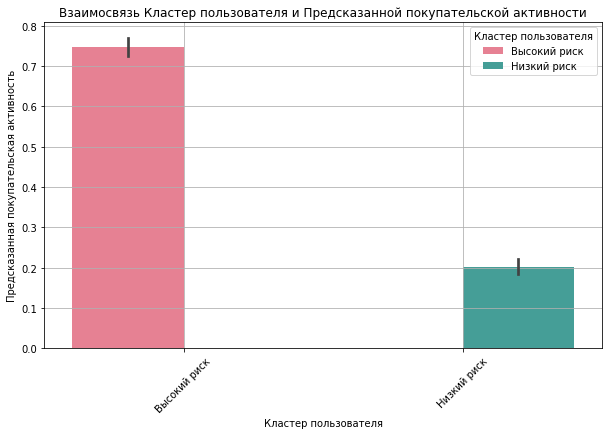

In [46]:
df_w = df_new.copy()
numeric_columns = df_w.select_dtypes(include='number').columns.tolist()
categorical_columns = df_w.select_dtypes(exclude='number').columns.tolist()
if 'id' in numeric_columns:
    numeric_columns.remove('id')
    
unic_values = df_w['Покупательская активность'].unique()


for feature in numeric_columns:
    # Цветовая палитра для кластеров
    palette = sns.color_palette('husl', len(df_new['Кластер пользователя'].unique()))

    # Создание scatter plot
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(df_new['Кластер пользователя'].unique()):
        cluster_data = df_new[df_new['Кластер пользователя'] == cluster]
        plt.scatter(cluster_data['Предсказанная покупательская активность'], cluster_data[feature], 
                    alpha=0.5, label=cluster, color=palette[i])

    plt.xlabel('Предсказанная покупательская активность')
    plt.ylabel(feature)
    plt.title(f'Взаимосвязь {feature} и Предсказанной покупательской активности')
    plt.legend(title='Кластер пользователя')
    plt.grid(True)
    plt.show()

# Построение barplot для категориальных столбцов
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Предсказанная покупательская активность', hue='Кластер пользователя', data=df_w, palette='husl')
    plt.title(f'Взаимосвязь {feature} и Предсказанной покупательской активности')
    plt.xlabel(feature)
    plt.ylabel('Предсказанная покупательская активность')
    plt.legend(title='Кластер пользователя')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

**Выводы:**
1. Выбрали категорию пользователей которая приносит высокий доход и имеет высокий шанс уйти.
2. Границы класса определили исходя из распределения пользователей по процентному соотношению, через определение перцентиля.
3. Повышать ежемесячные касания с пользователем, т.к. чем больше касаний с польователем за 6 месяцев, тем ниже группа риска.
3. Пересмотреть акции, чем больше акционных покупок. тем выше группа риска. Видимо пользователи покупают по акции и расстраиваются, что влияет на их выбор.
4. Сделать основной акцент на группе покупателей категории Электронника, видимо там сосредоточены пользователи, которые покупают товары с длительным сроком эксплуатации и перестают делать покупки в будущем.
5. Обратить внимание на пользователей, которые принесли выручку выше среднего на протяжении 2х и более периодов, возможно это отдельная группа покупателей, которая и в дальнейшем будет приносить выручку выше среднего.
6. Если покупатель проводит меньше 13 минут на сайте, высокая доля акционных товаров и долго не выбирает продукт, то видимо это импульсивный тип личности, который быстро загорается и быстро остывает. Этот сегмент нужно дополнительно стимулировать, возможно акционными предложениями. 
7. Так же покупатели которые имеют много не оплаченых товаров, так же попадают в зону риска, и их так же нужно стимулировать.
8. Рекомендация - профайлинг, типизирование личности - делаем выборку по каждой из групп, для того, что бы понять побудительные мотивы, ценности и страхи исходя из этого сформировать стратегию коммуникации.
9. До получения результатов, можно сделать дополнительную точку касания, если у человека более 3х неоплаченных товаров и он попадает в группу риска, то на товары в корзине делать ограниченные по времени акции и ввести купоны, которые побудят его совершить покупку в следующем месяце, т.к. это импульсивные личности, то в купоны можно включать неликвидные товары с невысокой ценой, для повышения среднего чека.
10. Так же несущественно, но отличается количество маркетинговых контактов с этой группой, этот показатель, тоже необходимо проверить, возможно это важный признак.
11. Средняя выручка ниже там, где были сбои, но в основном разница не существенная. Нужно повысить стабильность, это влияет на нашу выручку.

## Итоговые выводы

Сделайте общий вывод:
опишите задачу;
опишите исходные данные и проведённую предобработку;
напишите, что вы сделали для поиска лучшей модели;
укажите лучшую модель;
добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.
Оформление
Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Используйте форматирование и заголовки. 
Обратите внимание: структуру исследования в Jupyter Notebook вам нужно создать самостоятельно.


**Стояла цель:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Что было сделано:** 
1. Загрузили и исправили данные из разных источников.
2. Проверили и очистили данные от явных и неявных дубликатов. Проконтролировали общий объем выборки.
3. Провели исследовательский анализ данных, по результатам которого избавились от выбросов.
4. Объединили данные.
5. Провели корреляционный анализ данных, по результатам которого убедились, что слишком тесной взаимосвязи не наблюдается и устранять мультиколлинеарность нет необходимости.
6. Используя пайплайны обучили моделиKNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC() и выбрали лучшую, лучший результат показала логистическая регрессия c показателем 90% ROC-AUC на обучающей выборке и 83% на тестовой выборке.  
7. Изучили важность параметров, наиболее важные моменты:
- Наиболее значимые параметры это если заказывают электронику или технику для красоты и здоровья, то вероятность отмены не большая.
- Чем больше минут проводит пользователь и чем больше страниц за визит он просматривает, тем больше вероятность, что он не отменит заказ.
- А вот пользователи покупающие по акциям, имеющиеся неоплаченые покупки за квартиал и длительное время находящиеся на сайте - попадают в группу риска.
- Посмотрим по группам покупателей детальнее и попробуем разобраться с наиболее значемыми факторами дальше.
8. Провели сегментацию покупателей, ключевое:
- Если покупатель проводит меньше 13 минут на сайте, высокая доля акционных товаров и долго не выбирает продукт, то видимо это импульсивный тип личности, который быстро загорается и быстро остывает. Этот сегмент нужно дополнительно стимулировать, возможно акционными предложениями. 
- Так же покупатели которые имеют много не оплаченых товаров, так же попадают в зону риска, и их так же нужно стимулировать.
- Рекомендация - профайлинг, типизирование личности - делаем выборку по каждой из групп, для того, что бы понять побудительные мотивы, ценности и страхи исходя из этого сформировать стратегию коммуникации.
- До получения результатов, можно сделать дополнительную точку касания, если у человека более 3х неоплаченных товаров и он попадает в группу риска, то на товары в корзине делать ограниченные по времени акции и ввести купоны, которые побудят его совершить покупку в следующем месяце, т.к. это импульсивные личности, то в купоны можно включать неликвидные товары с невысокой ценой, для повышения среднего чека.

**Ключевая рекомендация:**
- По клиентам по которым предсказан выход или которые попадают в группу риска на основе сегментации делать в рамках месяца предложения на основе товаров в корзине и рекомендательных систем со скидками и другими промоакциями.

- Добавить купоны или бонусы с правом реализации в следующем периоде.

